In [1]:
%reload_ext autoreload
%autoreload 2
from utils.scraper.imports_ws import *
from utils.scraper.utils_ws import *

/data/home/osafak/.conda/envs/torch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


===> batch_size % world_size = 6. batch_size will be clipped to 64


In [3]:
start = time.time()

data = dict()
visited_urls = dict()
url = "https://www.wikipedia.org/wiki/David_Bowie"
data[url], html, num_chars = extract_text_from_url(url, visited_urls, num_chars=0)
new_links = get_links(html)
fcount = 0
write_period = 100
cutoff = 100
max_num_chars = 100 * 1e6

while new_links:
    print(f'len(new_links): {len(new_links)}')
    links = shave(new_links, visited_urls, cutoff) # cutoff=15
    print(f'\nlen(links): {len(links)}' + '\n' + '-----'*10, '\n')
    new_links = set()
    for url in links:
        if url not in visited_urls:
            data[url], html, num_chars = extract_text_from_url(url, visited_urls, num_chars)
            if html is not None:
                new_links = new_links.union(get_links(html)) 

    if (len(data.keys()) >= write_period) or not new_links:
        data, fcount = write_data_to_pkl(data, fcount, visited_urls)

    # Terminate if max amount of text data is crawled
    if num_chars > max_num_chars:
        print(f'max characters reached: num_chars:{num_chars} {print_runtime(start, printer=False)}')
        break
    print_runtime(start)
    
with open(f'dataset/visited_urls.txt', 'w') as file:
    json.dump(visited_urls, file)


chars added:128K   num_chars:128K  https://www.wikipedia.org/wiki/David_Bowie
len(new_links): 1605

len(links): 100
-------------------------------------------------- 

chars added: 18K   num_chars:147K  https://www.wikipedia.org/wiki/Get_Behind_Me_Satan
chars added: 87K   num_chars:234K  https://www.wikipedia.org/wiki/Asteroid
chars added: 28K   num_chars:263K  https://www.wikipedia.org/wiki/Angioplasty
chars added: 20K   num_chars:284K  https://www.wikipedia.org/wiki/Claude_Cahun
chars added: 17K   num_chars:302K  https://www.wikipedia.org/wiki/The_Man_Who
chars added: 78K   num_chars:381K  https://www.wikipedia.org/wiki/21_(Adele_album)
chars added: 12K   num_chars:393K  https://www.wikipedia.org/wiki/Lightnin%27_Hopkins
chars added: 25K   num_chars:419K  https://www.wikipedia.org/wiki/Billboard_(magazine)
chars added: 31K   num_chars:450K  https://www.wikipedia.org/wiki/Martin_Landau
chars added: 30K   num_chars:481K  https://www.wikipedia.org/wiki/Westport,_Connecticut
chars added

chars added: 17K   num_chars:  3M  https://www.wikipedia.org/wiki/Stay_(David_Bowie_song)
chars added: 16K   num_chars:  3M  https://www.wikipedia.org/wiki/%27Tis_a_Pity_She_Was_a_Whore
chars added:  6K   num_chars:  3M  https://www.wikipedia.org/wiki/Under_the_God
chars added:  7K   num_chars:  3M  https://www.wikipedia.org/wiki/Peter_Schilling
data written to dataset/wiki_000.pkl
Runtime: 1 min  7 sec
len(new_links): 25778

len(links): 100
-------------------------------------------------- 

chars added: 30K   num_chars:  3M  https://www.wikipedia.org/wiki/Criticism_of_the_Iraq_War
chars added: 35K   num_chars:  3M  https://www.wikipedia.org/wiki/Golden_Wind_(manga)
chars added: 15K   num_chars:  3M  https://www.wikipedia.org/wiki/Zoot_Sims
chars added:  5K   num_chars:  3M  https://www.wikipedia.org/wiki/Sarm_West_Studios
chars added:  2K   num_chars:  3M  https://www.wikipedia.org/wiki/Peggy_Little
chars added: 23K   num_chars:  3M  https://www.wikipedia.org/wiki/Minor_planet
chars

chars added:  5K   num_chars:  6M  https://www.wikipedia.org/wiki/Australian_Anarchist_Centenary_Celebrations
chars added: 31K   num_chars:  6M  https://www.wikipedia.org/wiki/Psilocin
chars added: 10K   num_chars:  6M  https://www.wikipedia.org/wiki/Eddie_Bert
chars added: 23K   num_chars:  6M  https://www.wikipedia.org/wiki/Placerita_Canyon_State_Park
chars added:  4K   num_chars:  6M  https://www.wikipedia.org/wiki/Southeastern_Connecticut
chars added:  9K   num_chars:  6M  https://www.wikipedia.org/wiki/Take_Me_to_the_Light
chars added: 10K   num_chars:  6M  https://www.wikipedia.org/wiki/Daniel_Massey_(actor)
chars added: 28K   num_chars:  6M  https://www.wikipedia.org/wiki/Vivienne_Westwood
chars added: 26K   num_chars:  6M  https://www.wikipedia.org/wiki/Art_Farmer
chars added: 53K   num_chars:  6M  https://www.wikipedia.org/wiki/J-pop
chars added:  2K   num_chars:  6M  https://www.wikipedia.org/wiki/List_of_number-one_albums_of_2012_(Poland)
chars added: 21K   num_chars:  6M  h

chars added:  2K   num_chars:  8M  https://www.wikipedia.org/wiki/Vanity_(1927_film)
chars added: 10K   num_chars:  8M  https://www.wikipedia.org/wiki/P.S._Kr%C3%B8yer
chars added: 63K   num_chars:  8M  https://www.wikipedia.org/wiki/Maudgalyayana
chars added:  3K   num_chars:  8M  https://www.wikipedia.org/wiki/List_of_chief_secretaries_of_Rajasthan
chars added: 16K   num_chars:  8M  https://www.wikipedia.org/wiki/68th_Golden_Globe_Awards#Winners_and_nominees
chars added: 23K   num_chars:  8M  https://www.wikipedia.org/wiki/Narration
chars added: 28K   num_chars:  8M  https://www.wikipedia.org/wiki/LGBT_rights_in_Kerala
chars added: 14K   num_chars:  8M  https://www.wikipedia.org/wiki/Kenneth_M._Curtis
chars added:  3K   num_chars:  8M  https://www.wikipedia.org/wiki/24_January_2011_Iraq_bombings
chars added: 78K   num_chars:  8M  https://www.wikipedia.org/wiki/Twin_Peaks_(2017_TV_series)
chars added: 47K   num_chars:  8M  https://www.wikipedia.org/wiki/1880_Democratic_National_Conven

chars added:  7K   num_chars: 10M  https://www.wikipedia.org/wiki/Methylenedioxyphentermine
chars added: 31K   num_chars: 10M  https://www.wikipedia.org/wiki/1893_United_States_Senate_election_in_Connecticut
chars added:129K   num_chars: 10M  https://www.wikipedia.org/wiki/Royal_Dutch_Shell
chars added: 34K   num_chars: 10M  https://www.wikipedia.org/wiki/Participants_in_Operation_Enduring_Freedom
chars added:  2K   num_chars: 10M  https://www.wikipedia.org/wiki/L%C3%A6gerneset
chars added:  7K   num_chars: 10M  https://www.wikipedia.org/wiki/Lucien_Rebatet
chars added: 28K   num_chars: 10M  https://www.wikipedia.org/wiki/Knox_Prairie_Fire
chars added:  6K   num_chars: 10M  https://www.wikipedia.org/wiki/2004_Alabama_elections
chars added: 13K   num_chars: 10M  https://www.wikipedia.org/wiki/Fritz_Todt
chars added: 11K   num_chars: 10M  https://www.wikipedia.org/wiki/California_Coast_Ranges
chars added:  5K   num_chars: 10M  https://www.wikipedia.org/wiki/Milameline
chars added: 31K   

chars added:  8K   num_chars: 12M  https://www.wikipedia.org/wiki/Hydroxydione
chars added:  1K   num_chars: 12M  https://www.wikipedia.org/wiki/Ibrahim_Haji_Jama_Mee%27aad
chars added: 60K   num_chars: 12M  https://www.wikipedia.org/wiki/Iron_Curtain
chars added: 38K   num_chars: 12M  https://www.wikipedia.org/wiki/Tickford_Racing
chars added: 43K   num_chars: 12M  https://www.wikipedia.org/wiki/Isotope
chars added: 25K   num_chars: 12M  https://www.wikipedia.org/wiki/Bill_Waller
chars added: 41K   num_chars: 12M  https://www.wikipedia.org/wiki/Jay_Rockefeller
chars added: 21K   num_chars: 12M  https://www.wikipedia.org/wiki/2012_United_States_House_of_Representatives_elections_in_Oklahoma
chars added: 10K   num_chars: 12M  https://www.wikipedia.org/wiki/2006_San_Jose_mayoral_election
chars added:  2K   num_chars: 12M  https://www.wikipedia.org/wiki/Nauvoo_House
chars added:  3K   num_chars: 12M  https://www.wikipedia.org/wiki/Gretchen_Ritter
chars added:  9K   num_chars: 12M  https:/

chars added: 19K   num_chars: 14M  https://www.wikipedia.org/wiki/Umatilla_National_Forest
chars added:  6K   num_chars: 14M  https://www.wikipedia.org/wiki/Brined_cheese
chars added:  2K   num_chars: 14M  https://www.wikipedia.org/wiki/Nashimoto-no-miya
chars added: 10K   num_chars: 14M  https://www.wikipedia.org/wiki/Measure_J
chars added:  3K   num_chars: 14M  https://www.wikipedia.org/wiki/Alexander_H._Bailey
chars added: 23K   num_chars: 14M  https://www.wikipedia.org/wiki/2023_New_Jersey_General_Assembly_election
chars added: 18K   num_chars: 14M  https://www.wikipedia.org/wiki/Yemenite_War_of_1972
chars added: 15K   num_chars: 14M  https://www.wikipedia.org/wiki/Districts_of_Sri_Lanka
chars added:  7K   num_chars: 14M  https://www.wikipedia.org/wiki/National_Register_of_Historic_Places_listings_in_St._Francois_County,_Missouri
chars added:  6K   num_chars: 14M  https://www.wikipedia.org/wiki/1916_United_States_elections
chars added:  2K   num_chars: 14M  https://www.wikipedia.or

chars added: 15K   num_chars: 15M  https://www.wikipedia.org/wiki/Blue_Lake_Regional_Park
chars added: 11K   num_chars: 15M  https://www.wikipedia.org/wiki/Frank_Crowther
chars added: 35K   num_chars: 15M  https://www.wikipedia.org/wiki/Metropolitan_Tower_(Manhattan)
chars added: 10K   num_chars: 15M  https://www.wikipedia.org/wiki/Claiborne_Parish
chars added: 40K   num_chars: 16M  https://www.wikipedia.org/wiki/2016_United_States_gubernatorial_elections
chars added:  8K   num_chars: 16M  https://www.wikipedia.org/wiki/1942_Arkansas_gubernatorial_election
chars added: 42K   num_chars: 16M  https://www.wikipedia.org/wiki/InterContinental_New_York_Barclay_Hotel
chars added: 35K   num_chars: 16M  https://www.wikipedia.org/wiki/Syriac_alphabet#East_Syriac_Maḏnḥāyā
chars added: 12K   num_chars: 16M  https://www.wikipedia.org/wiki/Anthon_H._Lund
chars added:  2K   num_chars: 16M  https://www.wikipedia.org/wiki/William_B._Bowling
chars added: 23K   num_chars: 16M  https://www.wikipedia.org/w

chars added: 40K   num_chars: 17M  https://www.wikipedia.org/wiki/Floral_emblem#United_Kingdom
chars added:  9K   num_chars: 17M  https://www.wikipedia.org/wiki/Scottish_Inns
chars added:  7K   num_chars: 17M  https://www.wikipedia.org/wiki/Delaware_Attorney_General
chars added:  3K   num_chars: 17M  https://www.wikipedia.org/wiki/1989_United_States_gubernatorial_elections
chars added:  6K   num_chars: 17M  https://www.wikipedia.org/wiki/Florida%27s_26th_congressional_district
chars added:106K   num_chars: 17M  https://www.wikipedia.org/wiki/IHeartMedia,_Inc.
chars added:  8K   num_chars: 17M  https://www.wikipedia.org/wiki/Lafitte-Vigordane
chars added: 13K   num_chars: 17M  https://www.wikipedia.org/wiki/Claverdon
chars added:  9K   num_chars: 17M  https://www.wikipedia.org/wiki/Cretan_cuisine
chars added:  0K   num_chars: 17M  https://www.wikipedia.org/wiki/Torta_de_nata
chars added: 23K   num_chars: 17M  https://www.wikipedia.org/wiki/Archaic_period_(North_America)
chars added: 16K

chars added: 43K   num_chars: 19M  https://www.wikipedia.org/wiki/Fairness_doctrine
chars added:  7K   num_chars: 19M  https://www.wikipedia.org/wiki/Protestantism_in_Japan
chars added:  2K   num_chars: 19M  https://www.wikipedia.org/wiki/Kafenio
chars added: 21K   num_chars: 19M  https://www.wikipedia.org/wiki/Ord%27s_kangaroo_rat
chars added: 13K   num_chars: 19M  https://www.wikipedia.org/wiki/1992_Central_American_and_Caribbean_Junior_Championships_in_Athletics
chars added:  9K   num_chars: 19M  https://www.wikipedia.org/wiki/Divestment
chars added: 40K   num_chars: 19M  https://www.wikipedia.org/wiki/List_of_ruling_political_parties_by_country
chars added:236K   num_chars: 20M  https://www.wikipedia.org/wiki/Helios
chars added: 52K   num_chars: 20M  https://www.wikipedia.org/wiki/2007_New_York_Jets_season
chars added: 14K   num_chars: 20M  https://www.wikipedia.org/wiki/Astra_Veicoli_Industriali
chars added: 24K   num_chars: 20M  https://www.wikipedia.org/wiki/Andrea_Agnelli
chars

chars added:  4K   num_chars: 21M  https://www.wikipedia.org/wiki/Cas_Walker
data written to dataset/wiki_008.pkl
Runtime: 9 min 51 sec
len(new_links): 25175

len(links): 100
-------------------------------------------------- 

chars added: 62K   num_chars: 21M  https://www.wikipedia.org/wiki/Christianity_in_Grenada
chars added: 21K   num_chars: 21M  https://www.wikipedia.org/wiki/Panathenaia
chars added:  6K   num_chars: 21M  https://www.wikipedia.org/wiki/WHKR
chars added:  1K   num_chars: 21M  https://www.wikipedia.org/wiki/Hellespontine_Sibyl
chars added:  2K   num_chars: 21M  https://www.wikipedia.org/wiki/Ascolia
chars added: 15K   num_chars: 21M  https://www.wikipedia.org/wiki/Staggered_board_of_directors
chars added: 34K   num_chars: 21M  https://www.wikipedia.org/wiki/Maenad
chars added:  3K   num_chars: 21M  https://www.wikipedia.org/wiki/Future_Front
chars added:  5K   num_chars: 21M  https://www.wikipedia.org/wiki/Banner-tailed_kangaroo_rat
chars added:  6K   num_chars: 21M

chars added: 52K   num_chars: 23M  https://www.wikipedia.org/wiki/Workers%27_Party_(Singapore)
chars added: 10K   num_chars: 23M  https://www.wikipedia.org/wiki/Suda
chars added:  5K   num_chars: 23M  https://www.wikipedia.org/wiki/Movement_for_Democratic_Change_Alliance
chars added: 31K   num_chars: 23M  https://www.wikipedia.org/wiki/Mike_McCarthy
chars added:  3K   num_chars: 23M  https://www.wikipedia.org/wiki/Heliadae
chars added: 12K   num_chars: 23M  https://www.wikipedia.org/wiki/WRVG-LP
data written to dataset/wiki_009.pkl
Runtime: 10 min 50 sec
len(new_links): 24497

len(links): 100
-------------------------------------------------- 

chars added:  2K   num_chars: 23M  https://www.wikipedia.org/wiki/Sammarinese_Populars
chars added: 12K   num_chars: 23M  https://www.wikipedia.org/wiki/Municipalities_of_Belgium
chars added:  3K   num_chars: 23M  https://www.wikipedia.org/wiki/Legion_(album)
chars added: 75K   num_chars: 23M  https://www.wikipedia.org/wiki/UN_Food_and_Agricultu

chars added: 13K   num_chars: 25M  https://www.wikipedia.org/wiki/Ale
chars added:  8K   num_chars: 25M  https://www.wikipedia.org/wiki/WJCL-FM
chars added:  3K   num_chars: 25M  https://www.wikipedia.org/wiki/Depinder_Singh
chars added: 11K   num_chars: 25M  https://www.wikipedia.org/wiki/Maria_of_Alania
chars added:  8K   num_chars: 25M  https://www.wikipedia.org/wiki/Website_monitoring
chars added: 13K   num_chars: 25M  https://www.wikipedia.org/wiki/Limos
chars added:  5K   num_chars: 25M  https://www.wikipedia.org/wiki/Mary_Benedict_Cushing
chars added:  2K   num_chars: 25M  https://www.wikipedia.org/wiki/Project_Hostile_Intent
chars added: 23K   num_chars: 25M  https://www.wikipedia.org/wiki/Putney_(UK_Parliament_constituency)
chars added: 20K   num_chars: 25M  https://www.wikipedia.org/wiki/WARF
chars added: 20K   num_chars: 25M  https://www.wikipedia.org/wiki/Dodge_Caliber
chars added:  6K   num_chars: 25M  https://www.wikipedia.org/wiki/Burnett_Memorial_Fountain
chars added: 2

chars added:  2K   num_chars: 27M  https://www.wikipedia.org/wiki/KZBK
chars added:  8K   num_chars: 27M  https://www.wikipedia.org/wiki/Union_League_of_Philadelphia
chars added:163K   num_chars: 27M  https://www.wikipedia.org/wiki/David_Lloyd_George,_1st_Earl_Lloyd-George_of_Dwyfor
chars added:  3K   num_chars: 27M  https://www.wikipedia.org/wiki/Eldorado_Air_Force_Station
chars added: 23K   num_chars: 27M  https://www.wikipedia.org/wiki/Brief_Cases
chars added:  1K   num_chars: 27M  https://www.wikipedia.org/wiki/KCVK
chars added: 20K   num_chars: 27M  https://www.wikipedia.org/wiki/1960_NFL_draft
chars added: 50K   num_chars: 27M  https://www.wikipedia.org/wiki/LARP
chars added: 11K   num_chars: 27M  https://www.wikipedia.org/wiki/Lister_Hospital,_Chelsea
chars added:  8K   num_chars: 27M  https://www.wikipedia.org/wiki/Statue_of_Mahatma_Gandhi_(New_York_City)
chars added: 11K   num_chars: 27M  https://www.wikipedia.org/wiki/18th_Replacement_Wing_(World_War_II)
chars added: 76K   nu

chars added:  3K   num_chars: 29M  https://www.wikipedia.org/wiki/New_Ghostbusters_II
chars added: 10K   num_chars: 29M  https://www.wikipedia.org/wiki/Jennie_Hwang
chars added: 10K   num_chars: 29M  https://www.wikipedia.org/wiki/Matthew_22
chars added: 10K   num_chars: 29M  https://www.wikipedia.org/wiki/MISCA
chars added: 38K   num_chars: 29M  https://www.wikipedia.org/wiki/Activision
chars added: 10K   num_chars: 29M  https://www.wikipedia.org/wiki/Reader_(liturgy)
chars added:  2K   num_chars: 29M  https://www.wikipedia.org/wiki/Ion_Budai-Deleanu
chars added: 19K   num_chars: 29M  https://www.wikipedia.org/wiki/Brandon_Marshall_(linebacker)
chars added: 79K   num_chars: 29M  https://www.wikipedia.org/wiki/List_of_Ghostbusters_characters#Lucky_Domingo
chars added:  6K   num_chars: 29M  https://www.wikipedia.org/wiki/ArenaBowl_VIII
chars added:  6K   num_chars: 29M  https://www.wikipedia.org/wiki/Michael_Walter_(American_football)
chars added:  5K   num_chars: 29M  https://www.wikip

chars added:  5K   num_chars: 31M  https://www.wikipedia.org/wiki/Carl_Lawson_(American_football)
chars added:  1K   num_chars: 31M  https://www.wikipedia.org/wiki/Jordan_Lang
chars added:  3K   num_chars: 31M  https://www.wikipedia.org/wiki/Moanda,_Democratic_Republic_of_the_Congo
chars added:138K   num_chars: 31M  https://www.wikipedia.org/wiki/Cluj-Napoca
chars added:  9K   num_chars: 31M  https://www.wikipedia.org/wiki/Combat_vehicle
chars added:  5K   num_chars: 31M  https://www.wikipedia.org/wiki/Chip_Lohmiller
chars added:  9K   num_chars: 31M  https://www.wikipedia.org/wiki/Bennie_Blades
chars added: 34K   num_chars: 31M  https://www.wikipedia.org/wiki/Tyler_Hansbrough
chars added: 12K   num_chars: 31M  https://www.wikipedia.org/wiki/Siberian_regionalism
chars added:  4K   num_chars: 31M  https://www.wikipedia.org/wiki/Rolleboise
chars added:  2K   num_chars: 31M  https://www.wikipedia.org/wiki/Tom_Graves_(American_football)
chars added: 20K   num_chars: 31M  https://www.wikipe

chars added:  3K   num_chars: 33M  https://www.wikipedia.org/wiki/Old_Harbour_Bay,_Jamaica
chars added:  3K   num_chars: 33M  https://www.wikipedia.org/wiki/William_Bright
chars added: 29K   num_chars: 33M  https://www.wikipedia.org/wiki/Kevin_Hart
chars added: 51K   num_chars: 33M  https://www.wikipedia.org/wiki/Belfast_Agreement
chars added:  7K   num_chars: 33M  https://www.wikipedia.org/wiki/Chyhyryn
chars added: 19K   num_chars: 33M  https://www.wikipedia.org/wiki/Al-Tira,_Haifa
chars added: 69K   num_chars: 33M  https://www.wikipedia.org/wiki/Djong_(ship)#European_age_of_discovery
chars added: 46K   num_chars: 33M  https://www.wikipedia.org/wiki/Press_coverage_during_the_Armenian_genocide
chars added: 16K   num_chars: 33M  https://www.wikipedia.org/wiki/832_(number)
chars added: 21K   num_chars: 33M  https://www.wikipedia.org/wiki/1930_FIFA_World_Cup_squads#Argentina
chars added: 17K   num_chars: 33M  https://www.wikipedia.org/wiki/Ranged_weapon
chars added: 15K   num_chars: 33M 

chars added:  5K   num_chars: 35M  https://www.wikipedia.org/wiki/Fausto_Vera
chars added:  6K   num_chars: 35M  https://www.wikipedia.org/wiki/Supercopa_Ecuador
chars added:  6K   num_chars: 35M  https://www.wikipedia.org/wiki/Khirbat_Al-Taqa
chars added:  3K   num_chars: 35M  https://www.wikipedia.org/wiki/K%C3%B6pr%C3%BCl%C3%BC_family
chars added:  3K   num_chars: 35M  https://www.wikipedia.org/wiki/Square_sail
chars added: 11K   num_chars: 35M  https://www.wikipedia.org/wiki/Nenad_Milija%C5%A1
chars added: 15K   num_chars: 35M  https://www.wikipedia.org/wiki/Royal_and_Venerable_Confraternity_of_the_Most_Blessed_Sacrament_of_Mafra
chars added:  8K   num_chars: 35M  https://www.wikipedia.org/wiki/Guillermo_Diaz_(basketball)
chars added: 28K   num_chars: 35M  https://www.wikipedia.org/wiki/The_SpongeBob_Musical:_Live_On_Stage!
chars added:  7K   num_chars: 35M  https://www.wikipedia.org/wiki/Young_Men%27s_Institute
chars added:  2K   num_chars: 35M  https://www.wikipedia.org/wiki/Nota

chars added:  3K   num_chars: 36M  https://www.wikipedia.org/wiki/Honduran_Liga_Nacional_Reserves
chars added: 16K   num_chars: 36M  https://www.wikipedia.org/wiki/Smithsonian_Channel
chars added:  9K   num_chars: 36M  https://www.wikipedia.org/wiki/Quarterstaff
chars added:  4K   num_chars: 36M  https://www.wikipedia.org/wiki/Due%C3%B1as,_Palencia
chars added:  5K   num_chars: 36M  https://www.wikipedia.org/wiki/1978_Ta%C3%A7a_de_Portugal_final
chars added: 13K   num_chars: 36M  https://www.wikipedia.org/wiki/Kendall_Drive
chars added:  3K   num_chars: 36M  https://www.wikipedia.org/wiki/2020_Supercopa_Ecuador
chars added: 10K   num_chars: 36M  https://www.wikipedia.org/wiki/LegADue
chars added: 15K   num_chars: 36M  https://www.wikipedia.org/wiki/Legislative_Assembly_of_Samoa
chars added: 20K   num_chars: 36M  https://www.wikipedia.org/wiki/AwesomenessTV_(TV_series)
chars added:  6K   num_chars: 36M  https://www.wikipedia.org/wiki/Comedy_Central_(French_TV_channel)
chars added: 25K  

chars added: 22K   num_chars: 38M  https://www.wikipedia.org/wiki/Lighting_design
chars added:  6K   num_chars: 38M  https://www.wikipedia.org/wiki/Zack_Mwekassa
chars added: 11K   num_chars: 38M  https://www.wikipedia.org/wiki/Championnat_National_A
chars added: 55K   num_chars: 38M  https://www.wikipedia.org/wiki/Adelaide_United
chars added:156K   num_chars: 38M  https://www.wikipedia.org/wiki/Center_(chess)
chars added: 10K   num_chars: 38M  https://www.wikipedia.org/wiki/2000%E2%80%9301_RC_Strasbourg_season
chars added: 10K   num_chars: 38M  https://www.wikipedia.org/wiki/Terebinth
chars added:  2K   num_chars: 38M  https://www.wikipedia.org/wiki/Alfred_Neumann_(architect)
chars added: 34K   num_chars: 39M  https://www.wikipedia.org/wiki/History_of_North_Macedonia
chars added: 54K   num_chars: 39M  https://www.wikipedia.org/wiki/Greenock
chars added: 42K   num_chars: 39M  https://www.wikipedia.org/wiki/Henry_Stimson
chars added:  5K   num_chars: 39M  https://www.wikipedia.org/wiki/

chars added: 43K   num_chars: 40M  https://www.wikipedia.org/wiki/Wind_tunnel
chars added:  1K   num_chars: 40M  https://www.wikipedia.org/wiki/1940_Emperor%27s_Cup_Final
chars added:  4K   num_chars: 40M  https://www.wikipedia.org/wiki/1990_Ta%C3%A7a_de_Portugal_Final
chars added:  6K   num_chars: 40M  https://www.wikipedia.org/wiki/Francis_J._Harvey
chars added:  8K   num_chars: 40M  https://www.wikipedia.org/wiki/Elizabeth_Selden_Rogers
chars added:  8K   num_chars: 40M  https://www.wikipedia.org/wiki/Battle_of_Nogales_(1915)#Aftermath
chars added:  0K   num_chars: 40M  https://www.wikipedia.org/wiki/Madritel
chars added:  3K   num_chars: 40M  https://www.wikipedia.org/wiki/Kosovo%E2%80%93Poland_relations
chars added: 56K   num_chars: 40M  https://www.wikipedia.org/wiki/Pyrolysis
chars added: 27K   num_chars: 40M  https://www.wikipedia.org/wiki/Wynberg,_Gauteng
chars added: 10K   num_chars: 40M  https://www.wikipedia.org/wiki/NICMOS
chars added: 21K   num_chars: 40M  https://www.wik

chars added:  8K   num_chars: 42M  https://www.wikipedia.org/wiki/Monarch_of_the_Seas
chars added:  9K   num_chars: 42M  https://www.wikipedia.org/wiki/China%E2%80%93Morocco_relations
chars added:  4K   num_chars: 42M  https://www.wikipedia.org/wiki/Manuel_Alejandro_Garc%C3%ADa_S%C3%A1nchez
chars added: 14K   num_chars: 42M  https://www.wikipedia.org/wiki/Patriarchs_of_Alexandria
chars added: 17K   num_chars: 42M  https://www.wikipedia.org/wiki/Papiss_Ciss%C3%A9
chars added:106K   num_chars: 42M  https://www.wikipedia.org/wiki/Endometriosis
chars added:  6K   num_chars: 42M  https://www.wikipedia.org/wiki/Florida_Gulf_Coast_Eagles_men%27s_basketball
chars added: 11K   num_chars: 42M  https://www.wikipedia.org/wiki/Robert_T._Stevens
chars added: 32K   num_chars: 42M  https://www.wikipedia.org/wiki/Skycovione
chars added:  7K   num_chars: 42M  https://www.wikipedia.org/wiki/Trump_International_Golf_Links,_Scotland
chars added: 13K   num_chars: 42M  https://www.wikipedia.org/wiki/FC_Imaba

chars added:  8K   num_chars: 44M  https://www.wikipedia.org/wiki/Biogeographic_realm
chars added:  2K   num_chars: 44M  https://www.wikipedia.org/wiki/Ahmed_Omar_(footballer)
data written to dataset/wiki_019.pkl
Runtime: 20 min 49 sec
len(new_links): 26031

len(links): 100
-------------------------------------------------- 

chars added: 31K   num_chars: 44M  https://www.wikipedia.org/wiki/NBA_on_ESPN
chars added:186K   num_chars: 44M  https://www.wikipedia.org/wiki/History_of_Beijing
chars added: 10K   num_chars: 44M  https://www.wikipedia.org/wiki/Laminated_veneer_lumber
chars added: 20K   num_chars: 44M  https://www.wikipedia.org/wiki/Julie_Halard-Decugis
chars added:  7K   num_chars: 44M  https://www.wikipedia.org/wiki/2019_Ta%C3%A7a_da_Liga_final
chars added:  7K   num_chars: 44M  https://www.wikipedia.org/wiki/Legal_biography
chars added: 23K   num_chars: 44M  https://www.wikipedia.org/wiki/Turkish_Cup
chars added: 13K   num_chars: 44M  https://www.wikipedia.org/wiki/1997_US_Ope

chars added:  7K   num_chars: 45M  https://www.wikipedia.org/wiki/Online_Mendelian_Inheritance_in_Man
chars added:  6K   num_chars: 45M  https://www.wikipedia.org/wiki/1971_NCAA_College_Division_basketball_tournament
chars added:  4K   num_chars: 45M  https://www.wikipedia.org/wiki/Dorogi_AC
chars added: 18K   num_chars: 45M  https://www.wikipedia.org/wiki/French_Fifth_Republic
chars added:  6K   num_chars: 45M  https://www.wikipedia.org/wiki/1959_DDR-Oberliga
chars added: 10K   num_chars: 45M  https://www.wikipedia.org/wiki/Mersudin_Ahmetovi%C4%87
chars added: 22K   num_chars: 45M  https://www.wikipedia.org/wiki/Biopsy
chars added: 14K   num_chars: 45M  https://www.wikipedia.org/wiki/2012_US_Open_%E2%80%93_Women%27s_singles
chars added:  9K   num_chars: 45M  https://www.wikipedia.org/wiki/Sludge_metal
chars added: 35K   num_chars: 45M  https://www.wikipedia.org/wiki/Shifting_cultivation
chars added: 15K   num_chars: 45M  https://www.wikipedia.org/wiki/Oklahoma_City_Thunder_draft_histo

chars added: 27K   num_chars: 47M  https://www.wikipedia.org/wiki/Vietnamese_name
chars added: 10K   num_chars: 47M  https://www.wikipedia.org/wiki/2001_Cerezo_Osaka_season
chars added: 15K   num_chars: 47M  https://www.wikipedia.org/wiki/Mart%C3%ADnez_(surname)
chars added: 12K   num_chars: 47M  https://www.wikipedia.org/wiki/Vaginal_cysts
chars added: 36K   num_chars: 47M  https://www.wikipedia.org/wiki/NBA_playoffs
chars added: 13K   num_chars: 47M  https://www.wikipedia.org/wiki/2006%E2%80%9307_Belgian_First_Division
chars added:  5K   num_chars: 47M  https://www.wikipedia.org/wiki/1894_U.S._National_Championships_%E2%80%93_Women%27s_singles
chars added: 22K   num_chars: 47M  https://www.wikipedia.org/wiki/Abu_Zayd_al-Dabusi
chars added:  5K   num_chars: 47M  https://www.wikipedia.org/wiki/Prognosis
chars added:  2K   num_chars: 47M  https://www.wikipedia.org/wiki/Avanhard_(sports_society)
chars added:  4K   num_chars: 47M  https://www.wikipedia.org/wiki/Jin-Cha-Ji_Border_Region
ch

chars added:  3K   num_chars: 48M  https://www.wikipedia.org/wiki/Thames_Street,_London
chars added: 13K   num_chars: 48M  https://www.wikipedia.org/wiki/CRX_(gene)
chars added: 53K   num_chars: 48M  https://www.wikipedia.org/wiki/Salsa_music
chars added:  5K   num_chars: 48M  https://www.wikipedia.org/wiki/Ovarian_artery
chars added: 28K   num_chars: 48M  https://www.wikipedia.org/wiki/Sanitation_worker
chars added: 14K   num_chars: 48M  https://www.wikipedia.org/wiki/Mycophenolic_acid
chars added: 20K   num_chars: 48M  https://www.wikipedia.org/wiki/Albert_Einstein_ATV
chars added: 11K   num_chars: 48M  https://www.wikipedia.org/wiki/Trap_(plumbing)
chars added: 13K   num_chars: 48M  https://www.wikipedia.org/wiki/Ray_Barretto
chars added:  2K   num_chars: 48M  https://www.wikipedia.org/wiki/Heidi_Biebl
chars added:  3K   num_chars: 48M  https://www.wikipedia.org/wiki/1909_Auburn_Tigers_football_team
chars added:  4K   num_chars: 48M  https://www.wikipedia.org/wiki/Ailem_Carvajal_G%C

chars added: 11K   num_chars: 49M  https://www.wikipedia.org/wiki/Germany_at_the_1896_Summer_Olympics
chars added:  1K   num_chars: 49M  https://www.wikipedia.org/wiki/Valery_Kerdemilidi
chars added:  3K   num_chars: 49M  https://www.wikipedia.org/wiki/Charles_Smith_(basketball,_born_1967)
chars added:  4K   num_chars: 49M  https://www.wikipedia.org/wiki/1964_Bradshaw_tornado
chars added: 12K   num_chars: 49M  https://www.wikipedia.org/wiki/Rintje_Ritsma
chars added:  2K   num_chars: 49M  https://www.wikipedia.org/wiki/Blues_Walk
chars added: 92K   num_chars: 49M  https://www.wikipedia.org/wiki/Mutations
chars added:  1K   num_chars: 49M  https://www.wikipedia.org/wiki/Deeper_Shade_of_Soul
chars added: 12K   num_chars: 49M  https://www.wikipedia.org/wiki/Armenians_in_Bangladesh
chars added: 37K   num_chars: 49M  https://www.wikipedia.org/wiki/Architecture_of_Cambodia
chars added:  6K   num_chars: 49M  https://www.wikipedia.org/wiki/V%C3%ADctor_Manuelle
chars added: 22K   num_chars: 49M

chars added: 13K   num_chars: 50M  https://www.wikipedia.org/wiki/2010_WNBA_Playoffs
chars added:  3K   num_chars: 50M  https://www.wikipedia.org/wiki/Armanitola_Government_High_School
chars added:  6K   num_chars: 50M  https://www.wikipedia.org/wiki/Flag_of_Guatemala
chars added: 11K   num_chars: 50M  https://www.wikipedia.org/wiki/University_of_Kuopio
chars added: 22K   num_chars: 51M  https://www.wikipedia.org/wiki/Spring_Street_(Manhattan)
chars added: 13K   num_chars: 51M  https://www.wikipedia.org/wiki/Adana_kebab%C4%B1
chars added:  5K   num_chars: 51M  https://www.wikipedia.org/wiki/2018_Gazprom_Hungarian_Open_%E2%80%93_Singles
chars added: 11K   num_chars: 51M  https://www.wikipedia.org/wiki/MMed
chars added: 54K   num_chars: 51M  https://www.wikipedia.org/wiki/Civil_liability_in_recreational_diving
chars added:  9K   num_chars: 51M  https://www.wikipedia.org/wiki/Conservatoire_de_musique_du_Qu%C3%A9bec_%C3%A0_Montr%C3%A9al
chars added: 15K   num_chars: 51M  https://www.wikipe

chars added: 19K   num_chars: 52M  https://www.wikipedia.org/wiki/Raja_yoga
chars added: 22K   num_chars: 52M  https://www.wikipedia.org/wiki/Vallabha_Acharya
chars added:  7K   num_chars: 52M  https://www.wikipedia.org/wiki/Legionowo
chars added: 10K   num_chars: 52M  https://www.wikipedia.org/wiki/M-V
chars added: 10K   num_chars: 52M  https://www.wikipedia.org/wiki/1994_Australian_Open_%E2%80%93_Mixed_doubles
chars added: 26K   num_chars: 52M  https://www.wikipedia.org/wiki/Long_March_3_(rocket_family)
chars added:  9K   num_chars: 52M  https://www.wikipedia.org/wiki/2003%E2%80%9304_NHL_transactions
chars added:  3K   num_chars: 52M  https://www.wikipedia.org/wiki/2011_Internationaux_de_Strasbourg_%E2%80%93_Doubles
chars added:  1K   num_chars: 52M  https://www.wikipedia.org/wiki/Isaac_Delgado
chars added:  6K   num_chars: 52M  https://www.wikipedia.org/wiki/Lipid_pneumonia
chars added: 11K   num_chars: 52M  https://www.wikipedia.org/wiki/RS-68
chars added: 10K   num_chars: 52M  htt

chars added:  2K   num_chars: 54M  https://www.wikipedia.org/wiki/Peri_Bearman
chars added:  2K   num_chars: 54M  https://www.wikipedia.org/wiki/Susna
chars added:  4K   num_chars: 54M  https://www.wikipedia.org/wiki/Mantle_(clothing)
chars added: 10K   num_chars: 54M  https://www.wikipedia.org/wiki/SMPTE_time_code
chars added:  7K   num_chars: 54M  https://www.wikipedia.org/wiki/David_Steinmetz_(historian)
chars added: 13K   num_chars: 54M  https://www.wikipedia.org/wiki/Durum
chars added:  6K   num_chars: 54M  https://www.wikipedia.org/wiki/2010_Italian_Open_%E2%80%93_Men%27s_singles
chars added:  9K   num_chars: 54M  https://www.wikipedia.org/wiki/The_Avenues_(Kuwait)
chars added:  7K   num_chars: 54M  https://www.wikipedia.org/wiki/Esquites
chars added:  6K   num_chars: 54M  https://www.wikipedia.org/wiki/Ellerbe_Becket
chars added: 71K   num_chars: 54M  https://www.wikipedia.org/wiki/Soybeans
chars added: 23K   num_chars: 54M  https://www.wikipedia.org/wiki/Guruvayurappan
chars ad

chars added: 27K   num_chars: 55M  https://www.wikipedia.org/wiki/Pilgrim_at_Tinker_Creek
chars added:  6K   num_chars: 55M  https://www.wikipedia.org/wiki/WLYE-FM
chars added: 19K   num_chars: 55M  https://www.wikipedia.org/wiki/Sternum
chars added: 73K   num_chars: 55M  https://www.wikipedia.org/wiki/Kallang
chars added: 12K   num_chars: 55M  https://www.wikipedia.org/wiki/QHL
chars added: 16K   num_chars: 55M  https://www.wikipedia.org/wiki/Nasi_tutug_oncom
chars added:  3K   num_chars: 55M  https://www.wikipedia.org/wiki/Boeber
chars added: 16K   num_chars: 55M  https://www.wikipedia.org/wiki/The_Game_Changers
chars added: 17K   num_chars: 55M  https://www.wikipedia.org/wiki/Thangmi_language
chars added:  8K   num_chars: 55M  https://www.wikipedia.org/wiki/Champa_(novel)
chars added: 16K   num_chars: 55M  https://www.wikipedia.org/wiki/Four_Continents_Figure_Skating_Championships
chars added:  3K   num_chars: 55M  https://www.wikipedia.org/wiki/1992%E2%80%9393_in_Bosnia_and_Herzego

chars added:  2K   num_chars: 57M  https://www.wikipedia.org/wiki/Goilala_District
chars added:  6K   num_chars: 57M  https://www.wikipedia.org/wiki/Costal_cartilages
chars added: 29K   num_chars: 57M  https://www.wikipedia.org/wiki/Pakistani_English
chars added:  2K   num_chars: 57M  https://www.wikipedia.org/wiki/2010_Portim%C3%A3o_Superleague_Formula_round
chars added: 19K   num_chars: 57M  https://www.wikipedia.org/wiki/Covenant_(biblical)
chars added: 28K   num_chars: 57M  https://www.wikipedia.org/wiki/Israel_national_under-20_football_team
chars added:  3K   num_chars: 57M  https://www.wikipedia.org/wiki/Kosovo_at_the_Mediterranean_Games
chars added: 25K   num_chars: 57M  https://www.wikipedia.org/wiki/Paris_Adult_Theatre_I_v._Slaton
chars added:  4K   num_chars: 57M  https://www.wikipedia.org/wiki/Fermented_bean_paste
chars added:  6K   num_chars: 57M  https://www.wikipedia.org/wiki/That_All_Shall_Be_Saved
chars added: 27K   num_chars: 57M  https://www.wikipedia.org/wiki/Amit%C

chars added: 12K   num_chars: 58M  https://www.wikipedia.org/wiki/Dick_O%27Connell
chars added:  6K   num_chars: 58M  https://www.wikipedia.org/wiki/Pa%C3%B1cika
chars added: 32K   num_chars: 58M  https://www.wikipedia.org/wiki/2023%E2%80%9324_Cypriot_Cup
chars added:  4K   num_chars: 58M  https://www.wikipedia.org/wiki/Doug_Cooper_(racing_driver)
chars added: 12K   num_chars: 58M  https://www.wikipedia.org/wiki/Muju_County
chars added: 18K   num_chars: 58M  https://www.wikipedia.org/wiki/2016_AFC_U-19_Championship
chars added:  1K   num_chars: 58M  https://www.wikipedia.org/wiki/Farmer_cheese
chars added: 10K   num_chars: 58M  https://www.wikipedia.org/wiki/Nalanda_University
chars added: 11K   num_chars: 58M  https://www.wikipedia.org/wiki/Cantonese_restaurant
chars added:  4K   num_chars: 58M  https://www.wikipedia.org/wiki/Tropenmuseum
chars added:  9K   num_chars: 58M  https://www.wikipedia.org/wiki/2004_European_Touring_Car_Championship
chars added: 22K   num_chars: 58M  https://

chars added: 14K   num_chars: 60M  https://www.wikipedia.org/wiki/Johnny_Callison
chars added: 20K   num_chars: 60M  https://www.wikipedia.org/wiki/Peabody,_Massachusetts
chars added: 13K   num_chars: 60M  https://www.wikipedia.org/wiki/2022_Siquijor_local_elections
chars added: 41K   num_chars: 60M  https://www.wikipedia.org/wiki/Speech_or_Debate_Clause
chars added:  5K   num_chars: 60M  https://www.wikipedia.org/wiki/2008_Checker_Auto_Parts_500
chars added:  2K   num_chars: 60M  https://www.wikipedia.org/wiki/Albert_Leduc
chars added: 22K   num_chars: 60M  https://www.wikipedia.org/wiki/Poe_v._Ullman
chars added: 13K   num_chars: 60M  https://www.wikipedia.org/wiki/2017_Federated_Auto_Parts_400
chars added: 43K   num_chars: 60M  https://www.wikipedia.org/wiki/York,_Pennsylvania
chars added: 14K   num_chars: 60M  https://www.wikipedia.org/wiki/1995_Davis_Cup
chars added:  3K   num_chars: 60M  https://www.wikipedia.org/wiki/Dagoberto
chars added: 20K   num_chars: 60M  https://www.wikip

chars added: 14K   num_chars: 62M  https://www.wikipedia.org/wiki/1981_Major_League_Baseball_All-Star_Game
chars added:  8K   num_chars: 62M  https://www.wikipedia.org/wiki/1796_State_of_the_Union_Address
chars added:  1K   num_chars: 62M  https://www.wikipedia.org/wiki/Dennis_Blair_(baseball)
chars added:  3K   num_chars: 62M  https://www.wikipedia.org/wiki/Maulana_Mazharul_Haque_Arabic_and_Persian_University
chars added: 23K   num_chars: 62M  https://www.wikipedia.org/wiki/Historical_markers_of_the_Philippines
chars added: 54K   num_chars: 62M  https://www.wikipedia.org/wiki/Tito_Sotto
chars added: 30K   num_chars: 62M  https://www.wikipedia.org/wiki/Lexus_LM
data written to dataset/wiki_030.pkl
Runtime: 31 min 12 sec
len(new_links): 26701

len(links): 100
-------------------------------------------------- 

chars added: 70K   num_chars: 62M  https://www.wikipedia.org/wiki/House_of_Representatives_of_the_Philippines#District_representation
chars added:  2K   num_chars: 62M  https://w

chars added: 17K   num_chars: 63M  https://www.wikipedia.org/wiki/Maserati_4CLT/48
chars added: 49K   num_chars: 63M  https://www.wikipedia.org/wiki/Picts#Art
chars added: 15K   num_chars: 63M  https://www.wikipedia.org/wiki/HMS_Sidon_(P259)
chars added:  5K   num_chars: 63M  https://www.wikipedia.org/wiki/263rd_Infantry_Division_(Wehrmacht)
chars added:  7K   num_chars: 63M  https://www.wikipedia.org/wiki/Las_Vegas_400
chars added:  5K   num_chars: 63M  https://www.wikipedia.org/wiki/Marcelo_Nic%C3%A1cio
chars added: 12K   num_chars: 63M  https://www.wikipedia.org/wiki/Toyism
chars added: 13K   num_chars: 63M  https://www.wikipedia.org/wiki/College_of_Southern_Nevada
chars added: 18K   num_chars: 63M  https://www.wikipedia.org/wiki/1954_New_York_Giants_(MLB)_season
chars added:  4K   num_chars: 63M  https://www.wikipedia.org/wiki/Lazi,_Siquijor
chars added: 43K   num_chars: 63M  https://www.wikipedia.org/wiki/List_of_shipwrecks_in_1966
chars added:  4K   num_chars: 63M  https://www.wi

chars added:  2K   num_chars: 64M  https://www.wikipedia.org/wiki/Federal_Appendix
chars added:  5K   num_chars: 64M  https://www.wikipedia.org/wiki/BlackRock_Smaller_Companies_Trust
chars added: 22K   num_chars: 65M  https://www.wikipedia.org/wiki/Esporte_Clube_Bahia
chars added:  2K   num_chars: 65M  https://www.wikipedia.org/wiki/Little_River_(Cape_Fear_River_tributary)
chars added:  2K   num_chars: 65M  https://www.wikipedia.org/wiki/Gradyville,_Pennsylvania
chars added:  3K   num_chars: 65M  https://www.wikipedia.org/wiki/Eguy_Rosario
chars added: 27K   num_chars: 65M  https://www.wikipedia.org/wiki/Economy_of_the_Democratic_Republic_of_the_Congo
chars added:  2K   num_chars: 65M  https://www.wikipedia.org/wiki/1983_Transamerica_Open
chars added: 25K   num_chars: 65M  https://www.wikipedia.org/wiki/Ad_blocking
chars added: 23K   num_chars: 65M  https://www.wikipedia.org/wiki/Women_in_law_enforcement
chars added:  3K   num_chars: 65M  https://www.wikipedia.org/wiki/Joe_Fry
chars ad

chars added:  8K   num_chars: 66M  https://www.wikipedia.org/wiki/List_of_members_of_the_European_Parliament_for_the_United_Kingdom,_1999-2004
chars added:  1K   num_chars: 66M  https://www.wikipedia.org/wiki/List_of_South_Australian_courts_and_tribunals
chars added: 17K   num_chars: 66M  https://www.wikipedia.org/wiki/Carl_Lundgren
chars added: 28K   num_chars: 66M  https://www.wikipedia.org/wiki/Grumman_F8F-1_Bearcat
chars added:  2K   num_chars: 66M  https://www.wikipedia.org/wiki/V%C3%96EST_Linz
chars added:  1K   num_chars: 66M  https://www.wikipedia.org/wiki/Kachhi_(caste)
chars added:  3K   num_chars: 66M  https://www.wikipedia.org/wiki/Judiciary_Act_of_1793
chars added:  3K   num_chars: 66M  https://www.wikipedia.org/wiki/Thomas_Fraser-Holmes
chars added: 10K   num_chars: 66M  https://www.wikipedia.org/wiki/Supplementary_Vote
chars added: 29K   num_chars: 66M  https://www.wikipedia.org/wiki/Dana_Point,_California
chars added: 11K   num_chars: 66M  https://www.wikipedia.org/wiki

chars added:  7K   num_chars: 68M  https://www.wikipedia.org/wiki/Argylle
chars added:  6K   num_chars: 68M  https://www.wikipedia.org/wiki/St._John_Brebeuf_Catholic_Church
chars added:  7K   num_chars: 68M  https://www.wikipedia.org/wiki/Jorge_de_la_Rosa
chars added: 17K   num_chars: 68M  https://www.wikipedia.org/wiki/City_of_Stonnington
chars added: 13K   num_chars: 68M  https://www.wikipedia.org/wiki/Online_judge
chars added: 24K   num_chars: 68M  https://www.wikipedia.org/wiki/The_Tragedy_of_Macbeth_(2021_film)
chars added: 30K   num_chars: 68M  https://www.wikipedia.org/wiki/Kahoolawe
chars added: 14K   num_chars: 68M  https://www.wikipedia.org/wiki/Wells_College
chars added:  7K   num_chars: 68M  https://www.wikipedia.org/wiki/Morton_National_Park
chars added: 11K   num_chars: 68M  https://www.wikipedia.org/wiki/Fairview_Park_(Hong_Kong)
chars added:  3K   num_chars: 68M  https://www.wikipedia.org/wiki/Swimming_at_the_2010_Commonwealth_Games_%E2%80%93_Men%27s_4_%C3%97_200_metre_

chars added:  7K   num_chars: 69M  https://www.wikipedia.org/wiki/John_Brownlie
chars added:  5K   num_chars: 69M  https://www.wikipedia.org/wiki/List_of_tallest_buildings_in_Estonia
chars added: 22K   num_chars: 69M  https://www.wikipedia.org/wiki/Sopwith_1%C2%BD_Strutter
chars added: 41K   num_chars: 69M  https://www.wikipedia.org/wiki/Countering_America%27s_Adversaries_Through_Sanctions_Act
chars added: 52K   num_chars: 69M  https://www.wikipedia.org/wiki/List_of_tallest_structures_in_Germany
chars added:  1K   num_chars: 69M  https://www.wikipedia.org/wiki/George_Proeser
chars added:  4K   num_chars: 69M  https://www.wikipedia.org/wiki/Massi_Furlan
chars added:  4K   num_chars: 69M  https://www.wikipedia.org/wiki/Delos_R._Ashley
chars added:  5K   num_chars: 69M  https://www.wikipedia.org/wiki/Bocagrande
chars added:  1K   num_chars: 69M  https://www.wikipedia.org/wiki/Tortillon
chars added: 36K   num_chars: 69M  https://www.wikipedia.org/wiki/Olympic_Stadium_(Amsterdam)
chars adde

chars added:  3K   num_chars: 70M  https://www.wikipedia.org/wiki/Fletcher_Hale
chars added: 41K   num_chars: 70M  https://www.wikipedia.org/wiki/Political_Appointments_System
chars added: 17K   num_chars: 70M  https://www.wikipedia.org/wiki/1964_Massachusetts_elections
chars added:  5K   num_chars: 70M  https://www.wikipedia.org/wiki/The_Homecoming_(statue)
chars added: 31K   num_chars: 70M  https://www.wikipedia.org/wiki/Golden_Age
chars added:  5K   num_chars: 70M  https://www.wikipedia.org/wiki/List_of_mayors_of_Worcester,_Massachusetts
chars added: 46K   num_chars: 70M  https://www.wikipedia.org/wiki/Politics_of_Nigeria
chars added: 21K   num_chars: 70M  https://www.wikipedia.org/wiki/Ford%27s_Theatre
chars added:  5K   num_chars: 70M  https://www.wikipedia.org/wiki/1964_United_States_Senate_election_in_New_Jersey
chars added: 17K   num_chars: 71M  https://www.wikipedia.org/wiki/Fourth_Anglo-Mysore_War
chars added: 12K   num_chars: 71M  https://www.wikipedia.org/wiki/1828_United_S

chars added:  5K   num_chars: 72M  https://www.wikipedia.org/wiki/Bernhard_M._Jacobsen
chars added: 41K   num_chars: 72M  https://www.wikipedia.org/wiki/Cricket_World_Cup#Teams'_performances
chars added:  6K   num_chars: 72M  https://www.wikipedia.org/wiki/Tweede_Divisie
chars added: 12K   num_chars: 72M  https://www.wikipedia.org/wiki/Lillian_Asplund
chars added: 48K   num_chars: 72M  https://www.wikipedia.org/wiki/Jock_Stein
chars added: 42K   num_chars: 72M  https://www.wikipedia.org/wiki/Irish_Guards
chars added:  4K   num_chars: 72M  https://www.wikipedia.org/wiki/On_the_Freedom_of_a_Christian
chars added: 17K   num_chars: 72M  https://www.wikipedia.org/wiki/1805_New_York%27s_2nd_and_3rd_congressional_districts_special_election
chars added: 10K   num_chars: 72M  https://www.wikipedia.org/wiki/Eddie_Krn%C4%8Devi%C4%87
chars added: 10K   num_chars: 72M  https://www.wikipedia.org/wiki/1817_New_York_gubernatorial_election
chars added: 23K   num_chars: 72M  https://www.wikipedia.org/wi

chars added: 56K   num_chars: 73M  https://www.wikipedia.org/wiki/2022_Pennsylvania_House_of_Representatives_election
chars added: 19K   num_chars: 73M  https://www.wikipedia.org/wiki/2004%E2%80%9305_UEFA_Champions_League#Second_qualifying_round
chars added: 11K   num_chars: 73M  https://www.wikipedia.org/wiki/1896_United_States_presidential_election_in_West_Virginia
chars added: 11K   num_chars: 73M  https://www.wikipedia.org/wiki/Renville_County,_Minnesota
chars added:  8K   num_chars: 73M  https://www.wikipedia.org/wiki/William_Atkinson_Jones
chars added:  5K   num_chars: 73M  https://www.wikipedia.org/wiki/2015_Johan_Cruijff_Schaal
chars added: 10K   num_chars: 73M  https://www.wikipedia.org/wiki/Polar_the_Titanic_Bear
data written to dataset/wiki_037.pkl
Runtime: 38 min 29 sec
len(new_links): 26758

len(links): 100
-------------------------------------------------- 

chars added: 11K   num_chars: 73M  https://www.wikipedia.org/wiki/Ihsan_Maulana_Mustofa
chars added:  4K   num_char

chars added:  6K   num_chars: 74M  https://www.wikipedia.org/wiki/Pine_Mountain_Trail_State_Park
chars added: 43K   num_chars: 74M  https://www.wikipedia.org/wiki/Summer_Olympics_in_1896
chars added:  4K   num_chars: 74M  https://www.wikipedia.org/wiki/National_Register_of_Historic_Places_listings_in_McCreary_County,_Kentucky
chars added:  7K   num_chars: 74M  https://www.wikipedia.org/wiki/National_Register_of_Historic_Places_listings_in_Floyd_County,_Kentucky
chars added: 46K   num_chars: 75M  https://www.wikipedia.org/wiki/Beauty_and_the_Beast
chars added:  6K   num_chars: 75M  https://www.wikipedia.org/wiki/Minister_of_Education_(India)
chars added: 17K   num_chars: 75M  https://www.wikipedia.org/wiki/Geography_of_Connecticut
chars added:  7K   num_chars: 75M  https://www.wikipedia.org/wiki/John_Spencer_Bassett
chars added:  3K   num_chars: 75M  https://www.wikipedia.org/wiki/Ronald_Waterreus
chars added: 32K   num_chars: 75M  https://www.wikipedia.org/wiki/4th_Estate_(imprint)
cha

chars added:  7K   num_chars: 76M  https://www.wikipedia.org/wiki/2019_Czech_Darts_Open
chars added:  4K   num_chars: 76M  https://www.wikipedia.org/wiki/Tandang_Sora_National_Shrine
chars added:  4K   num_chars: 76M  https://www.wikipedia.org/wiki/National_Register_of_Historic_Places_listings_in_Marlborough,_Massachusetts
chars added: 21K   num_chars: 76M  https://www.wikipedia.org/wiki/2010%E2%80%9311_Melbourne_Victory_FC_season
chars added: 20K   num_chars: 76M  https://www.wikipedia.org/wiki/Traveling_carnival
chars added:  9K   num_chars: 76M  https://www.wikipedia.org/wiki/Minister_of_Foreign_Affairs_(New_Zealand)
chars added:  5K   num_chars: 76M  https://www.wikipedia.org/wiki/The_Free_Press_Journal
chars added: 31K   num_chars: 76M  https://www.wikipedia.org/wiki/Uganda_at_the_2012_Summer_Olympics
chars added: 10K   num_chars: 76M  https://www.wikipedia.org/wiki/National_Highway_6_(India)(old_numbering)
chars added: 10K   num_chars: 76M  https://www.wikipedia.org/wiki/List_of_

chars added:  6K   num_chars: 77M  https://www.wikipedia.org/wiki/David_White_(actor)
chars added: 16K   num_chars: 77M  https://www.wikipedia.org/wiki/Rockingham,_Vermont
chars added:  2K   num_chars: 77M  https://www.wikipedia.org/wiki/1979%E2%80%9380_Liga_Artzit
chars added:  4K   num_chars: 77M  https://www.wikipedia.org/wiki/Languages_of_Guyana
chars added:  7K   num_chars: 77M  https://www.wikipedia.org/wiki/Three_Kings_Ridge
chars added: 15K   num_chars: 77M  https://www.wikipedia.org/wiki/Boy_Erased
chars added:  3K   num_chars: 77M  https://www.wikipedia.org/wiki/Swing_boat
chars added:  5K   num_chars: 77M  https://www.wikipedia.org/wiki/David_Clendon
chars added: 13K   num_chars: 77M  https://www.wikipedia.org/wiki/Monica_Maughan
chars added: 15K   num_chars: 77M  https://www.wikipedia.org/wiki/Austin,_MN_Micropolitan_Statistical_Area
chars added:  5K   num_chars: 77M  https://www.wikipedia.org/wiki/Reggie_Witherspoon_(sprinter)
chars added: 20K   num_chars: 77M  https://www

chars added:  6K   num_chars: 79M  https://www.wikipedia.org/wiki/Tmesis
chars added:  4K   num_chars: 79M  https://www.wikipedia.org/wiki/Singapore_Youth_Flying_Club
chars added:  3K   num_chars: 79M  https://www.wikipedia.org/wiki/Chorvad
chars added: 10K   num_chars: 79M  https://www.wikipedia.org/wiki/Dennis_Dugan
chars added:  5K   num_chars: 79M  https://www.wikipedia.org/wiki/Scott_Wright_(footballer)
chars added:  7K   num_chars: 79M  https://www.wikipedia.org/wiki/Plainmoor
chars added: 23K   num_chars: 79M  https://www.wikipedia.org/wiki/The_Hunt_for_Red_October_(film)
chars added: 13K   num_chars: 79M  https://www.wikipedia.org/wiki/Lemmon_v._New_York
chars added:  2K   num_chars: 79M  https://www.wikipedia.org/wiki/Grace_McDonald
chars added: 12K   num_chars: 79M  https://www.wikipedia.org/wiki/Tatyana_Ali
chars added:  7K   num_chars: 79M  https://www.wikipedia.org/wiki/Workers_Party_of_New_Zealand
chars added: 46K   num_chars: 79M  https://www.wikipedia.org/wiki/Rob_Pauls

chars added:  7K   num_chars: 80M  https://www.wikipedia.org/wiki/1960_United_States_Senate_election_in_Georgia
chars added: 25K   num_chars: 80M  https://www.wikipedia.org/wiki/2006%E2%80%9307_Football_Conference
chars added:  7K   num_chars: 80M  https://www.wikipedia.org/wiki/Mark_Richardson_(sprinter)
chars added: 27K   num_chars: 80M  https://www.wikipedia.org/wiki/Dark_Romanticism
chars added: 14K   num_chars: 80M  https://www.wikipedia.org/wiki/Collins,_Mississippi
chars added: 13K   num_chars: 80M  https://www.wikipedia.org/wiki/The_Britons
chars added:  7K   num_chars: 80M  https://www.wikipedia.org/wiki/Glenda_Sluga
chars added:  5K   num_chars: 80M  https://www.wikipedia.org/wiki/Blueshirts_(Falange)
chars added: 43K   num_chars: 80M  https://www.wikipedia.org/wiki/Carleton_S._Coon
chars added:  3K   num_chars: 80M  https://www.wikipedia.org/wiki/Les_Guichets_du_Louvre
chars added: 30K   num_chars: 80M  https://www.wikipedia.org/wiki/Ishtar_(film)
chars added:  8K   num_char

chars added:  6K   num_chars: 81M  https://www.wikipedia.org/wiki/Valley_of_the_Dinosaurs
chars added:  5K   num_chars: 81M  https://www.wikipedia.org/wiki/Irano-Afghan_race
chars added: 42K   num_chars: 81M  https://www.wikipedia.org/wiki/Police_Coast_Guard
chars added:  3K   num_chars: 81M  https://www.wikipedia.org/wiki/The_Eyes_of_Tammy_Faye_(2000_film)
chars added:  9K   num_chars: 81M  https://www.wikipedia.org/wiki/No_Time_for_Nuts
chars added:  4K   num_chars: 81M  https://www.wikipedia.org/wiki/Calvin_Ira_Kephart
chars added: 98K   num_chars: 82M  https://www.wikipedia.org/wiki/Landing_ship_tank
chars added:  2K   num_chars: 82M  https://www.wikipedia.org/wiki/Right_Before_Your_Eyes
chars added: 23K   num_chars: 82M  https://www.wikipedia.org/wiki/Ananda_Shankar_Jayant
chars added: 19K   num_chars: 82M  https://www.wikipedia.org/wiki/Suresh_Dutta
chars added: 25K   num_chars: 82M  https://www.wikipedia.org/wiki/National_League_(division)#Play-off_results
chars added: 69K   num

chars added: 24K   num_chars: 83M  https://www.wikipedia.org/wiki/Agarwood
chars added: 56K   num_chars: 83M  https://www.wikipedia.org/wiki/Cable_(comics)
chars added: 12K   num_chars: 83M  https://www.wikipedia.org/wiki/Juurouta_Kosugi
chars added: 16K   num_chars: 83M  https://www.wikipedia.org/wiki/USS_Dukes_County_(LST-735)
chars added: 27K   num_chars: 83M  https://www.wikipedia.org/wiki/Edwin_Jarvis
chars added: 13K   num_chars: 83M  https://www.wikipedia.org/wiki/Brian_Laws
chars added:  3K   num_chars: 83M  https://www.wikipedia.org/wiki/Norman_Garwood
chars added:  9K   num_chars: 83M  https://www.wikipedia.org/wiki/Honeycomb_(geometry)
chars added:  5K   num_chars: 83M  https://www.wikipedia.org/wiki/Henry_Benbridge
chars added:  2K   num_chars: 83M  https://www.wikipedia.org/wiki/Femu_a_Corsica
chars added:  7K   num_chars: 83M  https://www.wikipedia.org/wiki/Hanna%E2%80%93Barbera%27s_World_of_Super_Adventure
chars added: 10K   num_chars: 83M  https://www.wikipedia.org/wiki

chars added:  5K   num_chars: 85M  https://www.wikipedia.org/wiki/Pi%C3%A8ve
chars added: 13K   num_chars: 85M  https://www.wikipedia.org/wiki/Light_the_Night
chars added:  8K   num_chars: 85M  https://www.wikipedia.org/wiki/Mojo_(Tom_Petty_and_the_Heartbreakers_album)
chars added:  9K   num_chars: 85M  https://www.wikipedia.org/wiki/List_of_Burnley_F.C._managers
chars added:108K   num_chars: 85M  https://www.wikipedia.org/wiki/Chinese-American
chars added:  8K   num_chars: 85M  https://www.wikipedia.org/wiki/Hugo_the_Hippo
chars added: 28K   num_chars: 85M  https://www.wikipedia.org/wiki/Kurt_Busiek
chars added: 53K   num_chars: 85M  https://www.wikipedia.org/wiki/List_of_world_heavyweight_boxing_champions
chars added: 68K   num_chars: 85M  https://www.wikipedia.org/wiki/List_of_Star_Wars_Legends_characters
chars added:  8K   num_chars: 85M  https://www.wikipedia.org/wiki/Rungano_Nyoni
chars added:  2K   num_chars: 85M  https://www.wikipedia.org/wiki/Daniel_J._Weitzner
chars added:  5

chars added: 20K   num_chars: 87M  https://www.wikipedia.org/wiki/Ressha_Sentai_ToQger
chars added: 12K   num_chars: 87M  https://www.wikipedia.org/wiki/Drew_Friedman_(cartoonist)
chars added:  4K   num_chars: 87M  https://www.wikipedia.org/wiki/Madeline_Y._Hsu
chars added: 15K   num_chars: 87M  https://www.wikipedia.org/wiki/Peter_Withe
chars added: 10K   num_chars: 87M  https://www.wikipedia.org/wiki/Tony_Ellis
chars added: 31K   num_chars: 87M  https://www.wikipedia.org/wiki/Alexa_%26_Katie
chars added: 10K   num_chars: 87M  https://www.wikipedia.org/wiki/John_Picacio
chars added:  9K   num_chars: 87M  https://www.wikipedia.org/wiki/Duoprism
chars added: 16K   num_chars: 87M  https://www.wikipedia.org/wiki/Angel_(Thomas_Halloway)
chars added:  5K   num_chars: 87M  https://www.wikipedia.org/wiki/Chaman
chars added: 36K   num_chars: 87M  https://www.wikipedia.org/wiki/H.R._Pufnstuf
chars added: 22K   num_chars: 87M  https://www.wikipedia.org/wiki/List_of_programs_broadcast_by_Bravo
ch

chars added:  3K   num_chars: 89M  https://www.wikipedia.org/wiki/Armalausi
chars added: 22K   num_chars: 89M  https://www.wikipedia.org/wiki/Coverdale_and_Page
chars added: 14K   num_chars: 89M  https://www.wikipedia.org/wiki/Komainu
chars added:  5K   num_chars: 89M  https://www.wikipedia.org/wiki/Vijfhuizen
chars added: 43K   num_chars: 89M  https://www.wikipedia.org/wiki/List_of_programs_broadcast_by_Disney_Channel_(South_Korean_TV_channel)
chars added:  3K   num_chars: 89M  https://www.wikipedia.org/wiki/The_Caterpillar_(song)
data written to dataset/wiki_046.pkl
Runtime: 47 min 29 sec
len(new_links): 21630

len(links): 100
-------------------------------------------------- 

chars added:  1K   num_chars: 89M  https://www.wikipedia.org/wiki/Freaky_Trigger
chars added: 55K   num_chars: 89M  https://www.wikipedia.org/wiki/Compressed_natural_gas
chars added:  5K   num_chars: 89M  https://www.wikipedia.org/wiki/Logan_Square,_Philadelphia
chars added: 13K   num_chars: 89M  https://www.

chars added:  5K   num_chars: 91M  https://www.wikipedia.org/wiki/Teenage_Mutant_Ninja_Turtles_(2003_video_game)
chars added: 32K   num_chars: 91M  https://www.wikipedia.org/wiki/Primetime_Emmy_Award_for_Outstanding_Supporting_Actress_in_a_Limited_Series_or_Movie
chars added:  1K   num_chars: 91M  https://www.wikipedia.org/wiki/List_of_Syrian_television_series
chars added:  0K   num_chars: 91M  https://www.wikipedia.org/wiki/Lists_of_Virtual_Console_games_for_Wii_U
chars added:  5K   num_chars: 91M  https://www.wikipedia.org/wiki/List_of_world_regions_by_life_expectancy
chars added:  3K   num_chars: 91M  https://www.wikipedia.org/wiki/Dar_Dash
chars added: 21K   num_chars: 91M  https://www.wikipedia.org/wiki/Frozen_conflict
chars added:  3K   num_chars: 91M  https://www.wikipedia.org/wiki/Sleep_When_I%27m_Dead
chars added:  2K   num_chars: 91M  https://www.wikipedia.org/wiki/V-Rally_3
chars added: 13K   num_chars: 91M  https://www.wikipedia.org/wiki/Agathias
chars added:  1K   num_char

chars added:  4K   num_chars: 92M  https://www.wikipedia.org/wiki/Michael_Critobulus
chars added:  2K   num_chars: 92M  https://www.wikipedia.org/wiki/Tony_Auden
chars added: 55K   num_chars: 92M  https://www.wikipedia.org/wiki/The_Heritage_Foundation
chars added: 44K   num_chars: 92M  https://www.wikipedia.org/wiki/Samsung_Galaxy_S4
chars added:  6K   num_chars: 92M  https://www.wikipedia.org/wiki/CIOC-FM
chars added:  8K   num_chars: 92M  https://www.wikipedia.org/wiki/Lee_Purcell
chars added:  4K   num_chars: 92M  https://www.wikipedia.org/wiki/Ganga_Maiyya_Tohe_Piyari_Chadhaibo
chars added:  5K   num_chars: 92M  https://www.wikipedia.org/wiki/Pato_Margetic
chars added:  5K   num_chars: 92M  https://www.wikipedia.org/wiki/Take
chars added:  9K   num_chars: 92M  https://www.wikipedia.org/wiki/Swing-piston_engine
chars added: 13K   num_chars: 92M  https://www.wikipedia.org/wiki/1982%E2%80%9383_Northern_Counties_East_Football_League#Division_One_South
chars added:  4K   num_chars: 92M 

chars added:  6K   num_chars: 94M  https://www.wikipedia.org/wiki/South_African_Solar_Challenge
chars added: 21K   num_chars: 94M  https://www.wikipedia.org/wiki/2020%E2%80%9321_Isthmian_League#South_East_Division
chars added:  8K   num_chars: 94M  https://www.wikipedia.org/wiki/Bob_Gansler
chars added:  6K   num_chars: 94M  https://www.wikipedia.org/wiki/QBasic
chars added:  8K   num_chars: 94M  https://www.wikipedia.org/wiki/Wizard_Fan_Awards
chars added: 12K   num_chars: 94M  https://www.wikipedia.org/wiki/Samsung_Omnia_7
chars added:  5K   num_chars: 94M  https://www.wikipedia.org/wiki/Maha_Purushudu
chars added: 65K   num_chars: 94M  https://www.wikipedia.org/wiki/2015_NHL_Entry_Draft
chars added:  8K   num_chars: 94M  https://www.wikipedia.org/wiki/Call_of_Duty:_Modern_Warfare:_Mobilized
chars added:  8K   num_chars: 94M  https://www.wikipedia.org/wiki/Eesti_tippmodell_(season_3)
chars added: 19K   num_chars: 94M  https://www.wikipedia.org/wiki/Xbox_Live_Arcade
chars added:  5K  

chars added: 27K   num_chars: 95M  https://www.wikipedia.org/wiki/2015%E2%80%9316_Detroit_Red_Wings_season
chars added:  5K   num_chars: 95M  https://www.wikipedia.org/wiki/Sirivennela
chars added: 68K   num_chars: 95M  https://www.wikipedia.org/wiki/Las_Vegas
chars added: 25K   num_chars: 95M  https://www.wikipedia.org/wiki/List_of_Hindi_films_of_2019
chars added:  2K   num_chars: 95M  https://www.wikipedia.org/wiki/Commission_on_Key_National_Indicators
chars added:  1K   num_chars: 95M  https://www.wikipedia.org/wiki/Tayaramma_Bangarayya
chars added:  5K   num_chars: 95M  https://www.wikipedia.org/wiki/Jan_Marini
chars added: 13K   num_chars: 95M  https://www.wikipedia.org/wiki/Bhadriraju_Krishnamurti
chars added:  8K   num_chars: 95M  https://www.wikipedia.org/wiki/List_of_Marathi_films_of_1938
chars added: 22K   num_chars: 95M  https://www.wikipedia.org/wiki/Mande_language
chars added: 50K   num_chars: 95M  https://www.wikipedia.org/wiki/Banking
chars added: 68K   num_chars: 96M  h

chars added: 63K   num_chars: 97M  https://www.wikipedia.org/wiki/Laser
chars added: 20K   num_chars: 97M  https://www.wikipedia.org/wiki/41st_Infantry_Regiment_(United_States)
chars added:  7K   num_chars: 97M  https://www.wikipedia.org/wiki/Daktari
chars added: 19K   num_chars: 97M  https://www.wikipedia.org/wiki/South_Central_United_States
chars added: 14K   num_chars: 97M  https://www.wikipedia.org/wiki/Eugene_Meyer_(financier)
chars added: 18K   num_chars: 97M  https://www.wikipedia.org/wiki/VMware_Workstation_Player
chars added:  0K   num_chars: 97M  https://www.wikipedia.org/wiki/I.430
chars added: 77K   num_chars: 97M  https://www.wikipedia.org/wiki/Celtics%E2%80%93Lakers_rivalry
chars added: 62K   num_chars: 97M  https://www.wikipedia.org/wiki/University_of_Waterloo
chars added: 12K   num_chars: 97M  https://www.wikipedia.org/wiki/Jayden_Hunt
chars added:  1K   num_chars: 97M  https://www.wikipedia.org/wiki/Santosham_Best_Music_Director_Award
chars added:  1K   num_chars: 97M 

chars added: 19K   num_chars: 99M  https://www.wikipedia.org/wiki/Nevada_National_Guard
chars added: 13K   num_chars: 99M  https://www.wikipedia.org/wiki/John_Cullum
chars added:  3K   num_chars: 99M  https://www.wikipedia.org/wiki/David_D._Balam
chars added:  2K   num_chars: 99M  https://www.wikipedia.org/wiki/Arkadia_Traiskirchen_Lions
chars added: 41K   num_chars: 99M  https://www.wikipedia.org/wiki/History_of_Wolverhampton_Wanderers_F.C.
chars added: 12K   num_chars: 99M  https://www.wikipedia.org/wiki/1993%E2%80%9394_Isthmian_League#Premier_Division
chars added: 10K   num_chars: 99M  https://www.wikipedia.org/wiki/1924_Winter_Olympics
chars added: 18K   num_chars: 99M  https://www.wikipedia.org/wiki/Burlington_Street_(Hamilton,_Ontario)
chars added:  8K   num_chars: 99M  https://www.wikipedia.org/wiki/Solicitation
chars added: 15K   num_chars: 99M  https://www.wikipedia.org/wiki/Carlos_Gutierrez
chars added:  8K   num_chars: 99M  https://www.wikipedia.org/wiki/James_Worpel
chars a

chars added: 38K   num_chars:100M  https://www.wikipedia.org/wiki/Man_of_La_Mancha
chars added:  3K   num_chars:100M  https://www.wikipedia.org/wiki/Tome-Adelino,_New_Mexico
chars added:  0K   num_chars:100M  https://www.wikipedia.org/wiki/Lerma,_Campeche
chars added: 14K   num_chars:100M  https://www.wikipedia.org/wiki/1964-65_in_English_football
chars added:  2K   num_chars:100M  https://www.wikipedia.org/wiki/Arthur_Wilson_(English_footballer)
chars added:  6K   num_chars:100M  https://www.wikipedia.org/wiki/Seton_Village,_New_Mexico
chars added:  4K   num_chars:100M  https://www.wikipedia.org/wiki/Beneath_the_Underdog
chars added:  4K   num_chars:100M  https://www.wikipedia.org/wiki/Daniel_Stewart_(Australian_footballer)
chars added: 86K   num_chars:100M  https://www.wikipedia.org/wiki/New_Mexico_Lobos_men%27s_basketball
chars added:  5K   num_chars:100M  https://www.wikipedia.org/wiki/Albuquerque_Journal
chars added:  4K   num_chars:100M  https://www.wikipedia.org/wiki/Ontario_Hig

---

-----------------------
# Experiments

In [40]:
url ='https://en.wikipedia.org/wiki/Fall_of_Constantinople'
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
for script in soup(["script", "style"]):
    script.extract() # rip it out

divs = soup.find_all("div", class_='mw-parser-output')
text = ''.join([div.get_text() for div in divs])

# lines = (line.strip() for line in text.splitlines())
# chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# text = '\n'.join(chunk for chunk in chunks if chunk)

text = unicodedata.normalize("NFKD", text)
text = unidecode.unidecode(text)
print(text)


In [78]:
import requests
from bs4 import BeautifulSoup
        
def decompose_divs(list_class_names, name=''):
    if type(list_class_names) == str:
        list_class_names = [list_class_names]
    items = soup.find_all("div", {"class": list_class_names})
    for item in items:
        item.decompose()
        
    print(f'==> {len(items)} {name} successfully decomposed')

url ='https://en.wikipedia.org/wiki/Fall_of_Constantinople'

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Remove the References section
decompose_divs(["infobox"], name='infoboxes')
decompose_divs(["mw-references-wrap", "mw-references-columns"], name='references')

# # Extract paragraphs only from the bodyContent div
body_content = soup.find("div", {"id": "bodyContent"})
paragraphs = body_content.find_all("div")

# Combine all paragraph texts
text = "\n".join([paragraph.get_text() for paragraph in paragraphs])
text = unicodedata.normalize("NFKD", text)
text = unidecode.unidecode(text)

print(text)


==> 0 infoboxes successfully decomposed
==> 2 references successfully decomposed


Coordinates: 41deg01'00''N 28deg58'37''E / 41.0167degN 28.9769degE / 41.0167; 28.9769

From Wikipedia, the free encyclopedia


Coordinates: 41deg01'00''N 28deg58'37''E / 41.0167degN 28.9769degE / 41.0167; 28.9769

Coordinates: 41deg01'00''N 28deg58'37''E / 41.0167degN 28.9769degE / 41.0167; 28.9769
Coordinates: 41deg01'00''N 28deg58'37''E / 41.0167degN 28.9769degE / 41.0167; 28.9769
From Wikipedia, the free encyclopedia


1453 Ottoman capture of the Byzantine capital
For other sieges of the city, see List of sieges of Constantinople.


This article may be expanded with text translated from the corresponding article in French.  (December 2022) Click [show] for important translation instructions.
View a machine-translated version of the French article.
Machine translation, like DeepL or Google Translate, is a useful starting point for translations, but translators must revise errors as necessary and confir

---
## url_scraper

In [1]:
%%time 
%reload_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import time, json, random
import numpy as np
from utils.helpers import crawl_wiki_data, get_links, extract_single_url, shave, ptxt
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams.update({'legend.fontsize': 'small',
                       'font.size'      : 14,
                       'figure.figsize' : (9, 3.5),
                       'axes.labelsize' : 'medium',
                       'axes.titlesize' : 'medium',
                       'axes.grid'      : 'on',
                       'xtick.labelsize': 'medium',
                       'ytick.labelsize': 'medium'})

new_links = ["https://www.wikipedia.org/wiki/David_Bowie"]


/data/home/osafak/.conda/envs/torch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CUDA_VISIBLE_DEVICES = 1,2,3,4
CPU times: user 5.17 s, sys: 3.71 s, total: 8.88 s
Wall time: 1.22 s


In [2]:

s0 = time.time()
printer = True
wiki_prefix = 'https://www.wikipedia.org/wiki/'
outfile = 'dataset/spider_urls.json'
with open(outfile, 'w') as f:
    json.dump([], f)

# initialize variables
visited_urls = dict()
num_chars = 0 

shave(new_links, visited_urls)

step = 0 
tracker_new = []
tracker_visited = []
tracker_time = []


In [42]:
while len(visited_urls) < 1e5:
    step += 1
    url = new_links.pop(0)

    # shuffle new_links in place
    random.shuffle(new_links)

    text, html, num_chars = extract_single_url(url, visited_urls, num_chars)
    new_links.extend(get_links(html, new_links, visited_urls))

    if step % 10 == 0:
        print(f'{step:3d} -- page_length:{len(text)/1000:5.1f}K, '+
              f'len(new_links):{len(new_links)}, len(visited_urls):{len(visited_urls)}, '+ 
              f'num_chars:{ptxt(num_chars)}  {url}')

    tracker_new.append(len(new_links))
    tracker_visited.append(len(visited_urls))
    
    if step % 100 == 0:
        with open(outfile, 'r') as f:
            out1 = json.load(f)
        with open(outfile, 'w') as f:
            out2 = {item.split(wiki_prefix)[1] for item in (set(new_links).union(set(visited_urls.keys())))}
            out = sorted(set(out2.union(set(out1))))
            json.dump(out, f)
            print(f'\nstep:{step} {outfile} number of files: {len(out)}')
    
    tracker_time.append((time.time() - s0)/60)
    
list_urls = [item.split(wiki_prefix)[1] for item in (visited_urls)]


35670 -- page_length:  6.5K, len(new_links):1969828, len(visited_urls):35667, num_chars:595.48M  https://www.wikipedia.org/wiki/Siege_of_Darkness
35680 -- page_length:  6.6K, len(new_links):1969982, len(visited_urls):35677, num_chars:595.59M  https://www.wikipedia.org/wiki/Alexandra_Bruce
35740 -- page_length:  7.5K, len(new_links):1972169, len(visited_urls):35737, num_chars:596.41M  https://www.wikipedia.org/wiki/Soil-transmitted_helminth
35750 -- page_length:  5.7K, len(new_links):1972396, len(visited_urls):35747, num_chars:596.70M  https://www.wikipedia.org/wiki/Cosby,_Missouri
35760 -- page_length:  2.8K, len(new_links):1972840, len(visited_urls):35757, num_chars:596.96M  https://www.wikipedia.org/wiki/Yuppies_(film)
35770 -- page_length: 26.7K, len(new_links):1973323, len(visited_urls):35767, num_chars:597.19M  https://www.wikipedia.org/wiki/Flammability
35780 -- page_length:  5.4K, len(new_links):1973756, len(visited_urls):35777, num_chars:597.34M  https://www.wikipedia.org/wiki/

36240 -- page_length:  3.2K, len(new_links):1986702, len(visited_urls):36237, num_chars:603.84M  https://www.wikipedia.org/wiki/R._Tracy_Seyfert
36250 -- page_length:  6.5K, len(new_links):1986950, len(visited_urls):36247, num_chars:604.05M  https://www.wikipedia.org/wiki/Rajagopuram
36260 -- page_length:  3.0K, len(new_links):1987285, len(visited_urls):36257, num_chars:604.13M  https://www.wikipedia.org/wiki/Hope_Frozen
36270 -- page_length:  7.1K, len(new_links):1987574, len(visited_urls):36267, num_chars:604.32M  https://www.wikipedia.org/wiki/Rodale_Books
36280 -- page_length: 13.6K, len(new_links):1987706, len(visited_urls):36277, num_chars:604.40M  https://www.wikipedia.org/wiki/Old_Red_Sandstone
36290 -- page_length:  6.3K, len(new_links):1987907, len(visited_urls):36287, num_chars:604.48M  https://www.wikipedia.org/wiki/Ben_Granfelt
36300 -- page_length:  9.3K, len(new_links):1988221, len(visited_urls):36297, num_chars:604.67M  https://www.wikipedia.org/wiki/Tomas_Morato_Avenue

36770 -- page_length:  5.0K, len(new_links):2000151, len(visited_urls):36767, num_chars:611.06M  https://www.wikipedia.org/wiki/Delaram_District
36780 -- page_length:  4.8K, len(new_links):2000299, len(visited_urls):36777, num_chars:611.13M  https://www.wikipedia.org/wiki/Municipium
36790 -- page_length: 30.7K, len(new_links):2000424, len(visited_urls):36787, num_chars:611.30M  https://www.wikipedia.org/wiki/K16JW-D
36800 -- page_length:  1.9K, len(new_links):2000585, len(visited_urls):36797, num_chars:611.35M  https://www.wikipedia.org/wiki/Mark_Lavie

step:36800 dataset/spider_urls.json number of files: 2037384
36810 -- page_length: 12.7K, len(new_links):2001125, len(visited_urls):36807, num_chars:611.58M  https://www.wikipedia.org/wiki/25th_Cavalry
36820 -- page_length: 19.8K, len(new_links):2002745, len(visited_urls):36817, num_chars:611.74M  https://www.wikipedia.org/wiki/Blue_Flag_beach
36830 -- page_length:  1.6K, len(new_links):2002843, len(visited_urls):36827, num_chars:611.82

37300 -- page_length: 75.4K, len(new_links):2014720, len(visited_urls):37297, num_chars:618.87M  https://www.wikipedia.org/wiki/T-Mobile_USA

step:37300 dataset/spider_urls.json number of files: 2052019
37310 -- page_length:  3.1K, len(new_links):2014908, len(visited_urls):37307, num_chars:618.95M  https://www.wikipedia.org/wiki/Hana_Maria_Pravda
37320 -- page_length:  1.8K, len(new_links):2015038, len(visited_urls):37317, num_chars:619.10M  https://www.wikipedia.org/wiki/Fran%C3%A7ois_Dubourdeau
37330 -- page_length: 51.7K, len(new_links):2015228, len(visited_urls):37327, num_chars:619.21M  https://www.wikipedia.org/wiki/Italian-Brazilian
37340 -- page_length:  1.4K, len(new_links):2015399, len(visited_urls):37337, num_chars:619.29M  https://www.wikipedia.org/wiki/Stocksville,_North_Carolina
37350 -- page_length:  5.3K, len(new_links):2015564, len(visited_urls):37347, num_chars:619.49M  https://www.wikipedia.org/wiki/Mawanella_riots
37360 -- page_length: 12.5K, len(new_links):2015775,

37820 -- page_length:  4.3K, len(new_links):2026609, len(visited_urls):37817, num_chars:626.00M  https://www.wikipedia.org/wiki/European_College_of_Sport_Science
37830 -- page_length:  2.1K, len(new_links):2026936, len(visited_urls):37827, num_chars:626.08M  https://www.wikipedia.org/wiki/Twips
37840 -- page_length: 14.6K, len(new_links):2027226, len(visited_urls):37837, num_chars:626.36M  https://www.wikipedia.org/wiki/Gandhidham
37850 -- page_length:  2.4K, len(new_links):2027359, len(visited_urls):37847, num_chars:626.54M  https://www.wikipedia.org/wiki/List_of_Comorian_coups_d%27%C3%A9tat
37860 -- page_length: 45.7K, len(new_links):2028996, len(visited_urls):37857, num_chars:626.85M  https://www.wikipedia.org/wiki/Longhouse_Council
37870 -- page_length: 10.9K, len(new_links):2029070, len(visited_urls):37867, num_chars:626.92M  https://www.wikipedia.org/wiki/Deterrence_(film)
37880 -- page_length:  1.7K, len(new_links):2029247, len(visited_urls):37877, num_chars:627.08M  https://www

38330 -- page_length: 86.6K, len(new_links):2043032, len(visited_urls):38327, num_chars:634.50M  https://www.wikipedia.org/wiki/John_Fetterman
38340 -- page_length:  4.5K, len(new_links):2043316, len(visited_urls):38337, num_chars:634.66M  https://www.wikipedia.org/wiki/Shiphrah
38350 -- page_length:  2.1K, len(new_links):2043954, len(visited_urls):38347, num_chars:634.79M  https://www.wikipedia.org/wiki/Tomica_Kocijan
38360 -- page_length:  2.5K, len(new_links):2044321, len(visited_urls):38357, num_chars:635.10M  https://www.wikipedia.org/wiki/List_of_diplomatic_missions_in_Equatorial_Guinea
38370 -- page_length: 32.8K, len(new_links):2044508, len(visited_urls):38367, num_chars:635.35M  https://www.wikipedia.org/wiki/Black_Lightning
38380 -- page_length:  2.8K, len(new_links):2044711, len(visited_urls):38377, num_chars:635.46M  https://www.wikipedia.org/wiki/Michael_Haddix
38390 -- page_length:  7.4K, len(new_links):2045301, len(visited_urls):38387, num_chars:635.60M  https://www.wiki

38850 -- page_length:  5.7K, len(new_links):2057515, len(visited_urls):38847, num_chars:642.15M  https://www.wikipedia.org/wiki/Owong
38860 -- page_length:  2.3K, len(new_links):2057671, len(visited_urls):38857, num_chars:642.30M  https://www.wikipedia.org/wiki/Sili_River
38870 -- page_length: 15.8K, len(new_links):2057959, len(visited_urls):38867, num_chars:642.37M  https://www.wikipedia.org/wiki/Idol_Nacije
38880 -- page_length: 23.5K, len(new_links):2058234, len(visited_urls):38877, num_chars:642.48M  https://www.wikipedia.org/wiki/National_anthem_of_Indonesia
38890 -- page_length:  3.9K, len(new_links):2058394, len(visited_urls):38887, num_chars:642.67M  https://www.wikipedia.org/wiki/Tony_Velasquez
38900 -- page_length:100.0K, len(new_links):2058644, len(visited_urls):38897, num_chars:642.82M  https://www.wikipedia.org/wiki/Guelph

step:38900 dataset/spider_urls.json number of files: 2097543
38910 -- page_length:  5.2K, len(new_links):2058769, len(visited_urls):38907, num_chars:64

39370 -- page_length: 12.5K, len(new_links):2071620, len(visited_urls):39367, num_chars:649.18M  https://www.wikipedia.org/wiki/Langholm
39380 -- page_length:  7.1K, len(new_links):2072120, len(visited_urls):39377, num_chars:649.31M  https://www.wikipedia.org/wiki/1922_Guayaquil_general_strike
39390 -- page_length: 11.3K, len(new_links):2072220, len(visited_urls):39387, num_chars:649.43M  https://www.wikipedia.org/wiki/2011_North_Warwickshire_Borough_Council_election
39400 -- page_length: 10.2K, len(new_links):2072424, len(visited_urls):39397, num_chars:649.56M  https://www.wikipedia.org/wiki/List_of_heads_of_government_of_the_Bahamas

step:39400 dataset/spider_urls.json number of files: 2111823
Exception:HTTP Error 404: Not Found, url: https://www.wikipedia.org/wiki/%C5%BDelite_li_da_postanete_milioner%3F                                                             
39410 -- page_length:  5.1K, len(new_links):2072636, len(visited_urls):39407, num_chars:649.61M  https://www.wikipedia.or

39880 -- page_length: 11.6K, len(new_links):2083832, len(visited_urls):39877, num_chars:655.73M  https://www.wikipedia.org/wiki/Zwiefalten
39890 -- page_length: 14.5K, len(new_links):2084056, len(visited_urls):39887, num_chars:655.84M  https://www.wikipedia.org/wiki/Institute_of_Intercultural_Management_and_Communication
39900 -- page_length:  6.7K, len(new_links):2084115, len(visited_urls):39897, num_chars:655.97M  https://www.wikipedia.org/wiki/Debra!

step:39900 dataset/spider_urls.json number of files: 2124014
39910 -- page_length:  4.7K, len(new_links):2084213, len(visited_urls):39907, num_chars:656.01M  https://www.wikipedia.org/wiki/Choeung_Ek
39920 -- page_length: 31.6K, len(new_links):2084422, len(visited_urls):39917, num_chars:656.13M  https://www.wikipedia.org/wiki/Water-cooled_engine
39930 -- page_length:  7.6K, len(new_links):2084507, len(visited_urls):39927, num_chars:656.23M  https://www.wikipedia.org/wiki/Paula_Meehan
39940 -- page_length:  7.6K, len(new_links):2084604,


step:40400 dataset/spider_urls.json number of files: 2136552
40410 -- page_length:  8.2K, len(new_links):2096413, len(visited_urls):40407, num_chars:662.79M  https://www.wikipedia.org/wiki/Italian_Air_Force_ranks
40420 -- page_length:  6.6K, len(new_links):2096605, len(visited_urls):40417, num_chars:662.92M  https://www.wikipedia.org/wiki/Carcharhinus_coatesi
40430 -- page_length:  2.3K, len(new_links):2096966, len(visited_urls):40427, num_chars:663.06M  https://www.wikipedia.org/wiki/Jozua_Naud%C3%A9_(pastor)
40440 -- page_length: 10.3K, len(new_links):2097318, len(visited_urls):40437, num_chars:663.34M  https://www.wikipedia.org/wiki/Spokesperson_for_the_United_States_Department_of_State
40450 -- page_length: 45.6K, len(new_links):2097406, len(visited_urls):40447, num_chars:663.42M  https://www.wikipedia.org/wiki/Jeff_Denham
40460 -- page_length: 24.7K, len(new_links):2097647, len(visited_urls):40457, num_chars:663.60M  https://www.wikipedia.org/wiki/Quark_cheese
40470 -- page_lengt

40930 -- page_length:  4.6K, len(new_links):2110778, len(visited_urls):40927, num_chars:670.07M  https://www.wikipedia.org/wiki/Jeff_Bourne_(politician)
40940 -- page_length: 15.5K, len(new_links):2110884, len(visited_urls):40937, num_chars:670.23M  https://www.wikipedia.org/wiki/Corruption_in_Cameroon
40950 -- page_length:  7.0K, len(new_links):2111128, len(visited_urls):40947, num_chars:670.39M  https://www.wikipedia.org/wiki/Buckingham_Street
40960 -- page_length:  3.4K, len(new_links):2111349, len(visited_urls):40957, num_chars:670.62M  https://www.wikipedia.org/wiki/Dick_Yarmy
40970 -- page_length:  1.3K, len(new_links):2111585, len(visited_urls):40967, num_chars:670.67M  https://www.wikipedia.org/wiki/Planning_etc._(Scotland)_Act_2006
40980 -- page_length:  1.4K, len(new_links):2112133, len(visited_urls):40977, num_chars:670.90M  https://www.wikipedia.org/wiki/Hen_Azriel
40990 -- page_length:  1.0K, len(new_links):2112227, len(visited_urls):40987, num_chars:671.04M  https://www.w

41460 -- page_length: 12.1K, len(new_links):2124312, len(visited_urls):41457, num_chars:677.70M  https://www.wikipedia.org/wiki/1998_J.League
41470 -- page_length:  0.7K, len(new_links):2124514, len(visited_urls):41467, num_chars:677.82M  https://www.wikipedia.org/wiki/Yves_Person
41480 -- page_length:  0.9K, len(new_links):2124837, len(visited_urls):41477, num_chars:677.98M  https://www.wikipedia.org/wiki/Madrona_(Segovia)
41490 -- page_length: 17.0K, len(new_links):2125319, len(visited_urls):41487, num_chars:678.16M  https://www.wikipedia.org/wiki/Wonderland_Sydney
41500 -- page_length: 40.0K, len(new_links):2125544, len(visited_urls):41497, num_chars:678.31M  https://www.wikipedia.org/wiki/Westlake,_Los_Angeles

step:41500 dataset/spider_urls.json number of files: 2167043
41510 -- page_length:  7.0K, len(new_links):2125733, len(visited_urls):41507, num_chars:678.46M  https://www.wikipedia.org/wiki/Mealy_Mountains_National_Park_Reserve
41520 -- page_length:  1.1K, len(new_links):2125

41980 -- page_length:  3.8K, len(new_links):2136406, len(visited_urls):41977, num_chars:685.69M  https://www.wikipedia.org/wiki/Golanthra_railway_station
41990 -- page_length:  4.5K, len(new_links):2136720, len(visited_urls):41987, num_chars:685.90M  https://www.wikipedia.org/wiki/Innoko_National_Wildlife_Refuge
42000 -- page_length:  2.7K, len(new_links):2136828, len(visited_urls):41997, num_chars:685.97M  https://www.wikipedia.org/wiki/Jose_Maria_Rivas

step:42000 dataset/spider_urls.json number of files: 2178827
42010 -- page_length:  6.1K, len(new_links):2137057, len(visited_urls):42007, num_chars:686.05M  https://www.wikipedia.org/wiki/Solar_Terrestrial_Probes_program
42020 -- page_length: 10.2K, len(new_links):2137227, len(visited_urls):42017, num_chars:686.31M  https://www.wikipedia.org/wiki/Mars_Exploration_Ice_Mapper
42030 -- page_length:  5.8K, len(new_links):2137547, len(visited_urls):42027, num_chars:686.42M  https://www.wikipedia.org/wiki/Toni_Merkens
42040 -- page_length:

42490 -- page_length:  5.7K, len(new_links):2150731, len(visited_urls):42487, num_chars:693.63M  https://www.wikipedia.org/wiki/Vladislaus_III,_Duke_of_Bohemia
42500 -- page_length:  2.9K, len(new_links):2151003, len(visited_urls):42497, num_chars:693.75M  https://www.wikipedia.org/wiki/Looking_for_a_Boy

step:42500 dataset/spider_urls.json number of files: 2193501
42510 -- page_length: 13.8K, len(new_links):2151150, len(visited_urls):42507, num_chars:693.95M  https://www.wikipedia.org/wiki/Research_and_development
42520 -- page_length: 13.4K, len(new_links):2151573, len(visited_urls):42517, num_chars:694.05M  https://www.wikipedia.org/wiki/Gebeachan
42530 -- page_length:  8.6K, len(new_links):2151740, len(visited_urls):42527, num_chars:694.15M  https://www.wikipedia.org/wiki/Nonlinear_Dirac_equation
42540 -- page_length: 12.7K, len(new_links):2151902, len(visited_urls):42537, num_chars:694.35M  https://www.wikipedia.org/wiki/2022_Northern_Mariana_Islands_gubernatorial_election
42550 -


step:43000 dataset/spider_urls.json number of files: 2209123
43010 -- page_length:  5.9K, len(new_links):2166387, len(visited_urls):43007, num_chars:701.78M  https://www.wikipedia.org/wiki/Who_Told_You
43020 -- page_length: 38.7K, len(new_links):2166556, len(visited_urls):43017, num_chars:701.90M  https://www.wikipedia.org/wiki/Timothy_J._Broderick
43030 -- page_length: 14.2K, len(new_links):2167291, len(visited_urls):43027, num_chars:702.09M  https://www.wikipedia.org/wiki/Ocean_Software
43040 -- page_length: 13.4K, len(new_links):2167475, len(visited_urls):43037, num_chars:702.21M  https://www.wikipedia.org/wiki/Griffin_Dunne
43050 -- page_length: 17.9K, len(new_links):2167770, len(visited_urls):43047, num_chars:702.40M  https://www.wikipedia.org/wiki/Capital_University
43060 -- page_length:  6.7K, len(new_links):2168035, len(visited_urls):43057, num_chars:702.51M  https://www.wikipedia.org/wiki/Vicky_Galindo
43070 -- page_length:107.2K, len(new_links):2170149, len(visited_urls):430

43530 -- page_length: 56.1K, len(new_links):2181849, len(visited_urls):43527, num_chars:709.70M  https://www.wikipedia.org/wiki/List_of_nearest_exoplanets
43540 -- page_length:  4.2K, len(new_links):2182288, len(visited_urls):43537, num_chars:709.81M  https://www.wikipedia.org/wiki/Born_Yesterday_(album)
43550 -- page_length:  8.3K, len(new_links):2182436, len(visited_urls):43547, num_chars:709.90M  https://www.wikipedia.org/wiki/George_W._Fairchild
43560 -- page_length:  9.9K, len(new_links):2183318, len(visited_urls):43557, num_chars:710.15M  https://www.wikipedia.org/wiki/List_of_common_film_awards_categories
43570 -- page_length: 71.7K, len(new_links):2183499, len(visited_urls):43567, num_chars:710.36M  https://www.wikipedia.org/wiki/2019_European_Parliament_election_in_the_United_Kingdom
43580 -- page_length: 14.4K, len(new_links):2183721, len(visited_urls):43577, num_chars:710.42M  https://www.wikipedia.org/wiki/List_of_historical_longest-serving_members_of_the_United_States_Cong

44050 -- page_length: 10.7K, len(new_links):2196755, len(visited_urls):44047, num_chars:718.10M  https://www.wikipedia.org/wiki/Odisha_football_team
44060 -- page_length:  1.6K, len(new_links):2197280, len(visited_urls):44057, num_chars:718.18M  https://www.wikipedia.org/wiki/Cuban_green_anole
44070 -- page_length:  2.7K, len(new_links):2197443, len(visited_urls):44067, num_chars:718.36M  https://www.wikipedia.org/wiki/Technical_Service_Bulletin
44080 -- page_length:  4.9K, len(new_links):2197642, len(visited_urls):44077, num_chars:718.45M  https://www.wikipedia.org/wiki/Agesipolis_I
44090 -- page_length:  4.9K, len(new_links):2197712, len(visited_urls):44087, num_chars:718.49M  https://www.wikipedia.org/wiki/Serbian_Women%27s_Volleyball_League
44100 -- page_length:  2.7K, len(new_links):2197809, len(visited_urls):44097, num_chars:718.54M  https://www.wikipedia.org/wiki/Piberbach

step:44100 dataset/spider_urls.json number of files: 2241907
44110 -- page_length:  9.9K, len(new_links):2

44560 -- page_length:  6.2K, len(new_links):2212060, len(visited_urls):44557, num_chars:725.45M  https://www.wikipedia.org/wiki/Torii_Kiyomitsu_I
44570 -- page_length:  5.4K, len(new_links):2212233, len(visited_urls):44567, num_chars:725.54M  https://www.wikipedia.org/wiki/Saint-Georges-sur-Cher
44580 -- page_length:  8.2K, len(new_links):2212348, len(visited_urls):44577, num_chars:725.75M  https://www.wikipedia.org/wiki/Sullom_Voe_Terminal
44590 -- page_length:  4.7K, len(new_links):2212525, len(visited_urls):44587, num_chars:725.85M  https://www.wikipedia.org/wiki/Current_sheet
44600 -- page_length:  3.9K, len(new_links):2212621, len(visited_urls):44597, num_chars:725.98M  https://www.wikipedia.org/wiki/Shelling_of_Port_Gregory

step:44600 dataset/spider_urls.json number of files: 2257219
44610 -- page_length:  6.1K, len(new_links):2212747, len(visited_urls):44607, num_chars:726.07M  https://www.wikipedia.org/wiki/Charlie_Edwards_(boxer)
44620 -- page_length:  9.2K, len(new_links):22

45080 -- page_length:  2.7K, len(new_links):2223106, len(visited_urls):45077, num_chars:732.92M  https://www.wikipedia.org/wiki/Mongol_United_Autonomous_Government
45090 -- page_length: 34.6K, len(new_links):2223244, len(visited_urls):45087, num_chars:733.18M  https://www.wikipedia.org/wiki/Panzer-Lehr-Division
45100 -- page_length:  4.4K, len(new_links):2223485, len(visited_urls):45097, num_chars:733.34M  https://www.wikipedia.org/wiki/43rd_Grand_Bell_Awards

step:45100 dataset/spider_urls.json number of files: 2268583
45110 -- page_length: 10.2K, len(new_links):2223751, len(visited_urls):45107, num_chars:733.41M  https://www.wikipedia.org/wiki/Sports_in_Odisha
45120 -- page_length:  4.9K, len(new_links):2224153, len(visited_urls):45117, num_chars:733.58M  https://www.wikipedia.org/wiki/A_Huguenot,_on_St._Bartholomew%27s_Day
45130 -- page_length:  2.3K, len(new_links):2224442, len(visited_urls):45127, num_chars:733.73M  https://www.wikipedia.org/wiki/1933_Delaware_State_Hornets_footba

45600 -- page_length:  8.6K, len(new_links):2240105, len(visited_urls):45597, num_chars:740.53M  https://www.wikipedia.org/wiki/Elvis_Presley_Forever_stamp

step:45600 dataset/spider_urls.json number of files: 2285703
45610 -- page_length:  3.0K, len(new_links):2240319, len(visited_urls):45607, num_chars:740.64M  https://www.wikipedia.org/wiki/Swimming_at_the_1980_Summer_Olympics_%E2%80%93_Men%27s_400_metre_individual_medley
45620 -- page_length: 15.0K, len(new_links):2240621, len(visited_urls):45617, num_chars:741.04M  https://www.wikipedia.org/wiki/KTHV
45630 -- page_length:  7.5K, len(new_links):2241176, len(visited_urls):45627, num_chars:741.20M  https://www.wikipedia.org/wiki/G._Love_and_Special_Sauce
45640 -- page_length:  5.7K, len(new_links):2241477, len(visited_urls):45637, num_chars:741.33M  https://www.wikipedia.org/wiki/Willie_Coffey
45650 -- page_length: 59.0K, len(new_links):2241917, len(visited_urls):45647, num_chars:741.59M  https://www.wikipedia.org/wiki/23rd_Street%E2

46120 -- page_length:  8.7K, len(new_links):2251796, len(visited_urls):46117, num_chars:747.68M  https://www.wikipedia.org/wiki/The_Dish_(landmark)
46130 -- page_length:  3.9K, len(new_links):2251964, len(visited_urls):46127, num_chars:747.81M  https://www.wikipedia.org/wiki/Pedro_Tafur
46140 -- page_length:  4.7K, len(new_links):2252096, len(visited_urls):46137, num_chars:747.90M  https://www.wikipedia.org/wiki/Sinaloa_martin
46150 -- page_length:  4.5K, len(new_links):2252220, len(visited_urls):46147, num_chars:748.02M  https://www.wikipedia.org/wiki/Arid_Lands_Information_Network
46160 -- page_length:  3.8K, len(new_links):2252507, len(visited_urls):46157, num_chars:748.20M  https://www.wikipedia.org/wiki/1986_Texas_Tech_Red_Raiders_football_team
46170 -- page_length: 36.5K, len(new_links):2252717, len(visited_urls):46167, num_chars:748.37M  https://www.wikipedia.org/wiki/Golden_rule
46180 -- page_length: 17.1K, len(new_links):2252821, len(visited_urls):46177, num_chars:748.51M  htt

46640 -- page_length: 12.3K, len(new_links):2267432, len(visited_urls):46637, num_chars:754.98M  https://www.wikipedia.org/wiki/Bornholm_(Folketing_constituency)
46650 -- page_length: 95.0K, len(new_links):2267640, len(visited_urls):46647, num_chars:755.23M  https://www.wikipedia.org/wiki/List_of_minor_planets:_4001%E2%80%935000#235
46660 -- page_length:  2.8K, len(new_links):2267695, len(visited_urls):46657, num_chars:755.37M  https://www.wikipedia.org/wiki/1990_NHK_Trophy
46670 -- page_length: 17.5K, len(new_links):2267910, len(visited_urls):46667, num_chars:755.47M  https://www.wikipedia.org/wiki/Lucia_Aniello
46680 -- page_length:  3.0K, len(new_links):2269441, len(visited_urls):46677, num_chars:755.78M  https://www.wikipedia.org/wiki/HMS_Queen_Charlotte_(1810)
46690 -- page_length:  7.6K, len(new_links):2269614, len(visited_urls):46687, num_chars:755.93M  https://www.wikipedia.org/wiki/Diocese_of_Rochester
46700 -- page_length: 16.8K, len(new_links):2269886, len(visited_urls):4669

47170 -- page_length: 15.1K, len(new_links):2280831, len(visited_urls):47167, num_chars:762.50M  https://www.wikipedia.org/wiki/Michael_Dwyer#Guerilla_campaign
47180 -- page_length:  1.5K, len(new_links):2281008, len(visited_urls):47177, num_chars:762.60M  https://www.wikipedia.org/wiki/Dmitri_Silin
47190 -- page_length: 10.1K, len(new_links):2281352, len(visited_urls):47187, num_chars:762.75M  https://www.wikipedia.org/wiki/The_Pauline_Quirke_Academy
47200 -- page_length: 15.8K, len(new_links):2281540, len(visited_urls):47197, num_chars:762.85M  https://www.wikipedia.org/wiki/2017%E2%80%9318_CEV_Champions_League

step:47200 dataset/spider_urls.json number of files: 2328738
47210 -- page_length: 11.5K, len(new_links):2281777, len(visited_urls):47207, num_chars:762.94M  https://www.wikipedia.org/wiki/Hermann_II,_Count_of_Celje
47220 -- page_length: 16.6K, len(new_links):2281960, len(visited_urls):47217, num_chars:763.04M  https://www.wikipedia.org/wiki/Chiang_Mai_Province
47230 -- page_

47700 -- page_length:  5.4K, len(new_links):2293388, len(visited_urls):47697, num_chars:770.67M  https://www.wikipedia.org/wiki/Principal_of_the_University_of_St_Andrews

step:47700 dataset/spider_urls.json number of files: 2341086
47710 -- page_length: 44.9K, len(new_links):2293617, len(visited_urls):47707, num_chars:770.78M  https://www.wikipedia.org/wiki/List_of_World_Heritage_Sites_in_North_America
47720 -- page_length:  5.7K, len(new_links):2293853, len(visited_urls):47717, num_chars:771.06M  https://www.wikipedia.org/wiki/Maureen_Madden
47730 -- page_length: 13.1K, len(new_links):2294035, len(visited_urls):47727, num_chars:771.17M  https://www.wikipedia.org/wiki/Fervor_Records
47740 -- page_length:  8.8K, len(new_links):2294211, len(visited_urls):47737, num_chars:771.32M  https://www.wikipedia.org/wiki/Jo%C3%ABl_Dicker
47750 -- page_length: 15.3K, len(new_links):2294272, len(visited_urls):47747, num_chars:771.39M  https://www.wikipedia.org/wiki/Pre-Roman_Iron_Age_in_Northern_Euro

48220 -- page_length:  0.4K, len(new_links):2305960, len(visited_urls):48217, num_chars:778.29M  https://www.wikipedia.org/wiki/Malalignment_of_the_nail_plate
48230 -- page_length: 77.5K, len(new_links):2306459, len(visited_urls):48227, num_chars:778.46M  https://www.wikipedia.org/wiki/Pesky_pole
48240 -- page_length: 29.3K, len(new_links):2306657, len(visited_urls):48237, num_chars:778.57M  https://www.wikipedia.org/wiki/IMSA_GT_Series
48250 -- page_length:  2.2K, len(new_links):2306857, len(visited_urls):48247, num_chars:778.72M  https://www.wikipedia.org/wiki/Wild_Oats_(TV_series)
48260 -- page_length:  1.9K, len(new_links):2307039, len(visited_urls):48257, num_chars:778.86M  https://www.wikipedia.org/wiki/99th_Missile_Brigade
48270 -- page_length:  5.9K, len(new_links):2307253, len(visited_urls):48267, num_chars:778.98M  https://www.wikipedia.org/wiki/Suzie_Templeton
48280 -- page_length: 17.7K, len(new_links):2307686, len(visited_urls):48277, num_chars:779.12M  https://www.wikiped

48750 -- page_length:  7.0K, len(new_links):2320316, len(visited_urls):48747, num_chars:786.27M  https://www.wikipedia.org/wiki/WLFK
48760 -- page_length: 15.2K, len(new_links):2320426, len(visited_urls):48757, num_chars:786.40M  https://www.wikipedia.org/wiki/ScreenSelect
48770 -- page_length:113.1K, len(new_links):2320547, len(visited_urls):48767, num_chars:786.57M  https://www.wikipedia.org/wiki/List_of_music_students_by_teacher:_K_to_M#Victor_Massé
48780 -- page_length: 23.8K, len(new_links):2320682, len(visited_urls):48777, num_chars:786.69M  https://www.wikipedia.org/wiki/Jeb_Hensarling
48790 -- page_length: 10.3K, len(new_links):2320797, len(visited_urls):48787, num_chars:786.76M  https://www.wikipedia.org/wiki/List_of_musical_scales_and_modes
48800 -- page_length:  5.9K, len(new_links):2321021, len(visited_urls):48797, num_chars:786.88M  https://www.wikipedia.org/wiki/The_Punisher_(2014_series)

step:48800 dataset/spider_urls.json number of files: 2369819
48810 -- page_length: 

49280 -- page_length: 14.7K, len(new_links):2337212, len(visited_urls):49277, num_chars:794.65M  https://www.wikipedia.org/wiki/Histon_and_Impington
49290 -- page_length:  6.4K, len(new_links):2337489, len(visited_urls):49287, num_chars:794.94M  https://www.wikipedia.org/wiki/Yellow_bullhead
49300 -- page_length:  6.0K, len(new_links):2337699, len(visited_urls):49297, num_chars:795.02M  https://www.wikipedia.org/wiki/2023%E2%80%9324_Danish_Superliga

step:49300 dataset/spider_urls.json number of files: 2386997
49310 -- page_length:  4.7K, len(new_links):2337773, len(visited_urls):49307, num_chars:795.11M  https://www.wikipedia.org/wiki/Georg_I,_Duke_of_Saxe-Meiningen
49320 -- page_length: 16.0K, len(new_links):2337919, len(visited_urls):49317, num_chars:795.29M  https://www.wikipedia.org/wiki/Rid_of_Me
49330 -- page_length:110.5K, len(new_links):2338028, len(visited_urls):49327, num_chars:795.46M  https://www.wikipedia.org/wiki/Islamic_denominations
49340 -- page_length:  4.3K, len(new

49800 -- page_length:  4.9K, len(new_links):2348078, len(visited_urls):49797, num_chars:802.33M  https://www.wikipedia.org/wiki/Certificate_of_ascertainment

step:49800 dataset/spider_urls.json number of files: 2397876
49810 -- page_length: 13.5K, len(new_links):2348402, len(visited_urls):49807, num_chars:802.49M  https://www.wikipedia.org/wiki/Associa%C3%A7%C3%A3o_Atl%C3%A9tica_Ponte_Preta
49820 -- page_length:  2.2K, len(new_links):2348647, len(visited_urls):49817, num_chars:802.59M  https://www.wikipedia.org/wiki/2004_Spengler_Cup
49830 -- page_length: 20.9K, len(new_links):2349006, len(visited_urls):49827, num_chars:802.76M  https://www.wikipedia.org/wiki/Coagulase-negative_staphylococcus
49840 -- page_length:  5.9K, len(new_links):2349094, len(visited_urls):49837, num_chars:802.82M  https://www.wikipedia.org/wiki/John_Henry_Holland
49850 -- page_length: 17.6K, len(new_links):2349344, len(visited_urls):49847, num_chars:802.96M  https://www.wikipedia.org/wiki/Cathy_Freeman
49860 -- 

50320 -- page_length:  5.2K, len(new_links):2360249, len(visited_urls):50317, num_chars:810.02M  https://www.wikipedia.org/wiki/Track_lighting
50330 -- page_length: 11.0K, len(new_links):2360344, len(visited_urls):50327, num_chars:810.06M  https://www.wikipedia.org/wiki/Father_Paul_Walsh
50340 -- page_length:  6.4K, len(new_links):2360364, len(visited_urls):50337, num_chars:810.12M  https://www.wikipedia.org/wiki/Terry_Fair
50350 -- page_length:  6.2K, len(new_links):2360482, len(visited_urls):50347, num_chars:810.20M  https://www.wikipedia.org/wiki/Simeon_Kara
50360 -- page_length:  3.5K, len(new_links):2360626, len(visited_urls):50357, num_chars:810.41M  https://www.wikipedia.org/wiki/Nageia_nagi
50370 -- page_length:  8.1K, len(new_links):2360940, len(visited_urls):50367, num_chars:810.54M  https://www.wikipedia.org/wiki/Semper_Oper
50380 -- page_length:  6.6K, len(new_links):2361040, len(visited_urls):50377, num_chars:810.60M  https://www.wikipedia.org/wiki/Laviai_Nielsen
50390 -- 

50850 -- page_length: 19.9K, len(new_links):2372565, len(visited_urls):50847, num_chars:817.79M  https://www.wikipedia.org/wiki/The_talk_(racism_in_the_United_States)
50860 -- page_length: 12.5K, len(new_links):2373531, len(visited_urls):50857, num_chars:818.05M  https://www.wikipedia.org/wiki/Lomza_Yeshiva
50870 -- page_length:  5.4K, len(new_links):2373651, len(visited_urls):50867, num_chars:818.19M  https://www.wikipedia.org/wiki/Universit%C3%A9_F%C3%A9lix_Houphou%C3%ABt-Boigny
50880 -- page_length:  0.9K, len(new_links):2373767, len(visited_urls):50877, num_chars:818.34M  https://www.wikipedia.org/wiki/Yeya_River
50890 -- page_length:  2.1K, len(new_links):2374057, len(visited_urls):50887, num_chars:818.45M  https://www.wikipedia.org/wiki/Kusye-Alexandrovsky
50900 -- page_length: 37.0K, len(new_links):2374220, len(visited_urls):50897, num_chars:818.56M  https://www.wikipedia.org/wiki/List_of_Statutory_Rules_of_Northern_Ireland,_2001

step:50900 dataset/spider_urls.json number of fi

51380 -- page_length: 18.3K, len(new_links):2386077, len(visited_urls):51377, num_chars:825.58M  https://www.wikipedia.org/wiki/Grand_Central_Madison
51390 -- page_length:  2.4K, len(new_links):2386194, len(visited_urls):51387, num_chars:825.67M  https://www.wikipedia.org/wiki/Extension_neglect
51400 -- page_length:  1.3K, len(new_links):2386375, len(visited_urls):51397, num_chars:825.77M  https://www.wikipedia.org/wiki/Interpretability

step:51400 dataset/spider_urls.json number of files: 2437773
51410 -- page_length: 46.2K, len(new_links):2386475, len(visited_urls):51407, num_chars:825.99M  https://www.wikipedia.org/wiki/Tuguegarao_City,_Cagayan
51420 -- page_length:  4.5K, len(new_links):2386611, len(visited_urls):51417, num_chars:826.08M  https://www.wikipedia.org/wiki/Columbia_Features
51430 -- page_length: 11.9K, len(new_links):2386738, len(visited_urls):51427, num_chars:826.22M  https://www.wikipedia.org/wiki/Anapa
51440 -- page_length:  0.8K, len(new_links):2386836, len(visited

51910 -- page_length: 14.8K, len(new_links):2399039, len(visited_urls):51907, num_chars:833.54M  https://www.wikipedia.org/wiki/History_of_Sweden_(1611%E2%80%931648)
51920 -- page_length:  7.4K, len(new_links):2399144, len(visited_urls):51917, num_chars:833.68M  https://www.wikipedia.org/wiki/Joker%27s_Favor
51930 -- page_length: 42.2K, len(new_links):2399339, len(visited_urls):51927, num_chars:833.82M  https://www.wikipedia.org/wiki/GeForce#VOLTA


KeyboardInterrupt: 

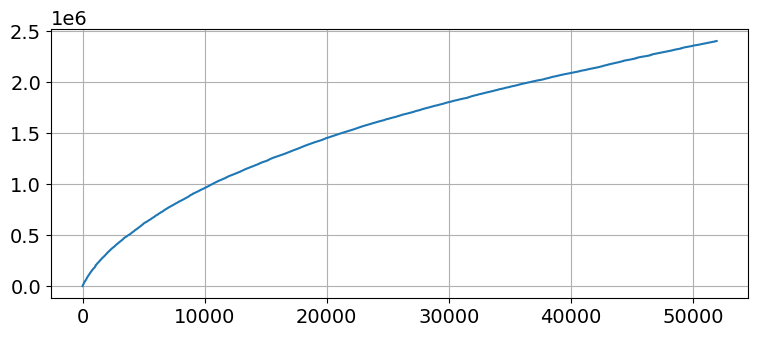

In [43]:
plt.plot(tracker_new)

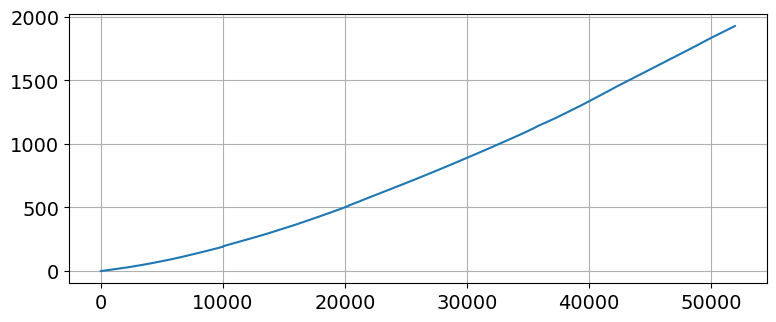

In [44]:
plt.plot(tracker_time) 

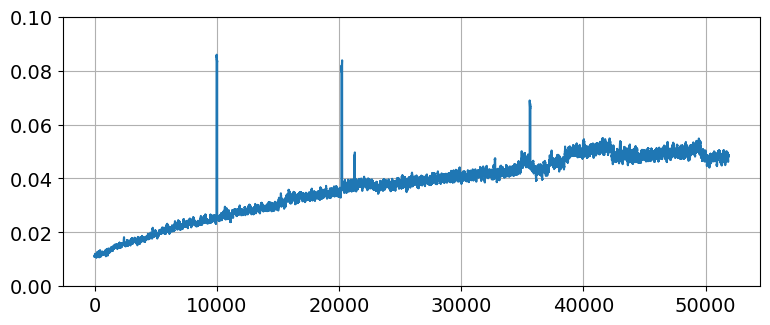

In [80]:
def moving_average(arr, w=3) :
    ret = np.cumsum(arr, dtype=float)
    ret[w:] = ret[w:] - ret[:-w]
    return ret[w - 1:] / w

out = np.array(tracker_time)
s = 0
plt.plot(moving_average(np.diff(out[s:s+1000000]), w=60))
plt.title('time')
plt.ylim(0,0.1);

In [ ]:
ctr = collections.Counter(nums)
keys = sorted(ctr.keys())

while True:
    # Eliminate a group of straights  (3,4,5,6,7) x N
    lo = keys[0]
    val = ctr[lo]
    
    for i in range(5):
        if lo not in ctr:
            return False
        ctr[lo+i] -= val
        if ctr[lo+i] == 0:
            del ctr[lo+i]
            keys.pop(0)
        elif ctr[lo+i] < 0:
            return False

return True

In [99]:
%%time 
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from utils.imports import *
from utils.helpers import *
from utils.model import *


CPU times: user 0 ns, sys: 1.69 ms, total: 1.69 ms
Wall time: 1.41 ms


In [2]:
def jsonify_news_dataset():
    """ Choose the English news files
        Tokenize them
        Shard them in lists of length 7 million tokens
        Save them in json format

        europarl-v6.en          0.296 GB
        news-commentary-v6.en   0.024 GB
        news.2007.en.shuffled   1.770 GB
        news.2008.en.shuffled   4.388 GB
        news.2009.en.shuffled   5.385 GB
        news.2010.en.shuffled   2.094 GB
        news.2011.en.shuffled   0.286 GB
    """

    start = time.time()
    dir_dataset = "/data/home/osafak/code/mygpt/dataset"
    dir_news = "/data/home/osafak/code/mygpt/dataset/news"
    PATH = f"{dir_news}/*.en*"
    ls = glob.glob(PATH)
    ls.sort(key=lambda x: x.split("/")[-1])

    for fname in ls:
        s0 = time.time()
        with open(fname, 'r') as f:
            text = f.read()
            print(f'"{fname.split("/")[-1]}": {len(text)/1e9:.3f} GB  {print_runtime(s0, False)}')
            s0 = time.time()

        enc_text = encode(text)
        print(f'encode(text): {print_runtime(s0, False)}')
        s0 = time.time()

        n = len(enc_text)
        dx = int(7e6)
        num_chunks = int(np.ceil(n / dx))
        for i in range(num_chunks):
            chunk = enc_text[i*dx : (i+1)*dx] 
            fname_new = f'{fname.split("/")[-1]}_{i:03d}.json'
            with open(f'{dir_dataset}/news_json/{fname_new}', 'w') as f:
                json.dump(chunk, f)
                print(f'"{fname_new}"  length = {len(chunk)/1e6:.2f} million  {print_runtime(start, False)}')



"europarl-v6.en": 0.296 GB  (2 sec)
encode(text): (33 sec)
torch.tensor: (0 sec)
"europarl-v6.en_000.json"  length = 7.00 million 
"europarl-v6.en_001.json"  length = 7.00 million 
"europarl-v6.en_002.json"  length = 7.00 million 
"europarl-v6.en_003.json"  length = 7.00 million 
"europarl-v6.en_004.json"  length = 7.00 million 
"europarl-v6.en_005.json"  length = 7.00 million 
"europarl-v6.en_006.json"  length = 7.00 million 
"europarl-v6.en_007.json"  length = 7.00 million 
"europarl-v6.en_008.json"  length = 3.34 million 
(1 min  0 sec)
"news-commentary-v6.en": 0.024 GB  (0 sec)
encode(text): (3 sec)
torch.tensor: (0 sec)
"news-commentary-v6.en_000.json"  length = 4.81 million 
(1 min  6 sec)
"news.2007.en.shuffled": 1.770 GB  (5 sec)
encode(text): (3 min 46 sec)
torch.tensor: (6 sec)
"news.2007.en.shuffled_000.json"  length = 7.00 million 
"news.2007.en.shuffled_001.json"  length = 7.00 million 
"news.2007.en.shuffled_002.json"  length = 7.00 million 
"news.2007.en.shuffled_003.jso

"news.2008.en.shuffled_071.json"  length = 7.00 million 
"news.2008.en.shuffled_072.json"  length = 7.00 million 
"news.2008.en.shuffled_073.json"  length = 7.00 million 
"news.2008.en.shuffled_074.json"  length = 7.00 million 
"news.2008.en.shuffled_075.json"  length = 7.00 million 
"news.2008.en.shuffled_076.json"  length = 7.00 million 
"news.2008.en.shuffled_077.json"  length = 7.00 million 
"news.2008.en.shuffled_078.json"  length = 7.00 million 
"news.2008.en.shuffled_079.json"  length = 7.00 million 
"news.2008.en.shuffled_080.json"  length = 7.00 million 
"news.2008.en.shuffled_081.json"  length = 7.00 million 
"news.2008.en.shuffled_082.json"  length = 7.00 million 
"news.2008.en.shuffled_083.json"  length = 7.00 million 
"news.2008.en.shuffled_084.json"  length = 7.00 million 
"news.2008.en.shuffled_085.json"  length = 7.00 million 
"news.2008.en.shuffled_086.json"  length = 7.00 million 
"news.2008.en.shuffled_087.json"  length = 7.00 million 
"news.2008.en.shuffled_088.json

"news.2009.en.shuffled_074.json"  length = 7.00 million 
"news.2009.en.shuffled_075.json"  length = 7.00 million 
"news.2009.en.shuffled_076.json"  length = 7.00 million 
"news.2009.en.shuffled_077.json"  length = 7.00 million 
"news.2009.en.shuffled_078.json"  length = 7.00 million 
"news.2009.en.shuffled_079.json"  length = 7.00 million 
"news.2009.en.shuffled_080.json"  length = 7.00 million 
"news.2009.en.shuffled_081.json"  length = 7.00 million 
"news.2009.en.shuffled_082.json"  length = 7.00 million 
"news.2009.en.shuffled_083.json"  length = 7.00 million 
"news.2009.en.shuffled_084.json"  length = 7.00 million 
"news.2009.en.shuffled_085.json"  length = 7.00 million 
"news.2009.en.shuffled_086.json"  length = 7.00 million 
"news.2009.en.shuffled_087.json"  length = 7.00 million 
"news.2009.en.shuffled_088.json"  length = 7.00 million 
"news.2009.en.shuffled_089.json"  length = 7.00 million 
"news.2009.en.shuffled_090.json"  length = 7.00 million 
"news.2009.en.shuffled_091.json

"news.2010.en.shuffled_048.json"  length = 7.00 million 
"news.2010.en.shuffled_049.json"  length = 7.00 million 
"news.2010.en.shuffled_050.json"  length = 7.00 million 
"news.2010.en.shuffled_051.json"  length = 7.00 million 
"news.2010.en.shuffled_052.json"  length = 7.00 million 
"news.2010.en.shuffled_053.json"  length = 7.00 million 
"news.2010.en.shuffled_054.json"  length = 7.00 million 
"news.2010.en.shuffled_055.json"  length = 7.00 million 
"news.2010.en.shuffled_056.json"  length = 7.00 million 
"news.2010.en.shuffled_057.json"  length = 7.00 million 
"news.2010.en.shuffled_058.json"  length = 7.00 million 
"news.2010.en.shuffled_059.json"  length = 7.00 million 
"news.2010.en.shuffled_060.json"  length = 7.00 million 
"news.2010.en.shuffled_061.json"  length = 7.00 million 
"news.2010.en.shuffled_062.json"  length = 7.00 million 
"news.2010.en.shuffled_063.json"  length = 7.00 million 
"news.2010.en.shuffled_064.json"  length = 7.00 million 
"news.2010.en.shuffled_065.json

In [37]:
# def tensorify_news_dataset():
""" Choose the English news files
    Tokenize them
    Shard them in tensors of length .9 billion tokens
    Save them in torch tensor format

    europarl-v6.en          0.296 GB
    news-commentary-v6.en   0.024 GB
    news.2007.en.shuffled   1.770 GB
    news.2008.en.shuffled   4.388 GB
    news.2009.en.shuffled   5.385 GB
    news.2010.en.shuffled   2.094 GB
    news.2011.en.shuffled   0.286 GB
"""

start = time.time()
dir_dataset = "/data/home/osafak/code/mygpt/dataset"
dir_news = f"{dir_dataset}/news"
PATH = f"{dir_news}/*.en*"
ls = glob.glob(PATH)
ls.sort(key=lambda x: x.split("/")[-1])

total_tokens = 0
for q, fname in enumerate(ls):
    s0 = time.time()
    with open(fname, 'r') as f:
        text = f.read()
        print(f'"{fname.split("/")[-1]}":   f.read():{len(text)/1e9:.3f} billion chars   {print_runtime(s0, False)}')
        s0 = time.time()

    enc_text = encode(text)
    total_tokens += len(enc_text)
    print(f'encode(text):  total_tokens:{total_tokens/1e9:.3f} billion tokens   {print_runtime(s0, False)}')
    s0 = time.time()

    data = torch.tensor(enc_text, dtype=torch.int32)
    print(f'torch.tensor: {print_runtime(s0, False)}')
    s0 = time.time()

    n = len(data)
    dx = int(.9e9 + 1)
    num_chunks = int(np.ceil(n / dx))
    for i in range(num_chunks):
        chunk = data[i*dx : (i+1)*dx] 
        fname_new = f'{fname.split("/")[-1]}_{i:03d}.pt'
        torch.save(chunk, f'{dir_dataset}/news_tensors/{fname_new}')
        print(f'"   --- {fname_new}"  length = {len(chunk)/1e6:.2f} million  {print_runtime(start, False)}')
    print()
    

"europarl-v6.en":   f.read():0.296 billion chars   (2 sec)
encode(text):  total_tokens:0.059 billion tokens   (42 sec)
torch.tensor: (1 sec)
"   --- europarl-v6.en_000.pt"  length = 59.34 million  (46 sec)

"news-commentary-v6.en":   f.read():0.024 billion chars   (0 sec)
encode(text):  total_tokens:0.064 billion tokens   (3 sec)
torch.tensor: (0 sec)
"   --- news-commentary-v6.en_000.pt"  length = 4.81 million  (50 sec)

"news.2007.en.shuffled":   f.read():1.770 billion chars   (5 sec)
encode(text):  total_tokens:0.457 billion tokens   (3 min 47 sec)
torch.tensor: (4 sec)
"   --- news.2007.en.shuffled_000.pt"  length = 392.89 million  (4 min 52 sec)

"news.2008.en.shuffled":   f.read():4.388 billion chars   (45 sec)
encode(text):  total_tokens:1.425 billion tokens   (10 min  5 sec)
torch.tensor: (14 sec)
"   --- news.2008.en.shuffled_000.pt"  length = 900.00 million  (16 min  7 sec)
"   --- news.2008.en.shuffled_001.pt"  length = 68.16 million  (16 min 16 sec)

"news.2009.en.shuffled"